In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

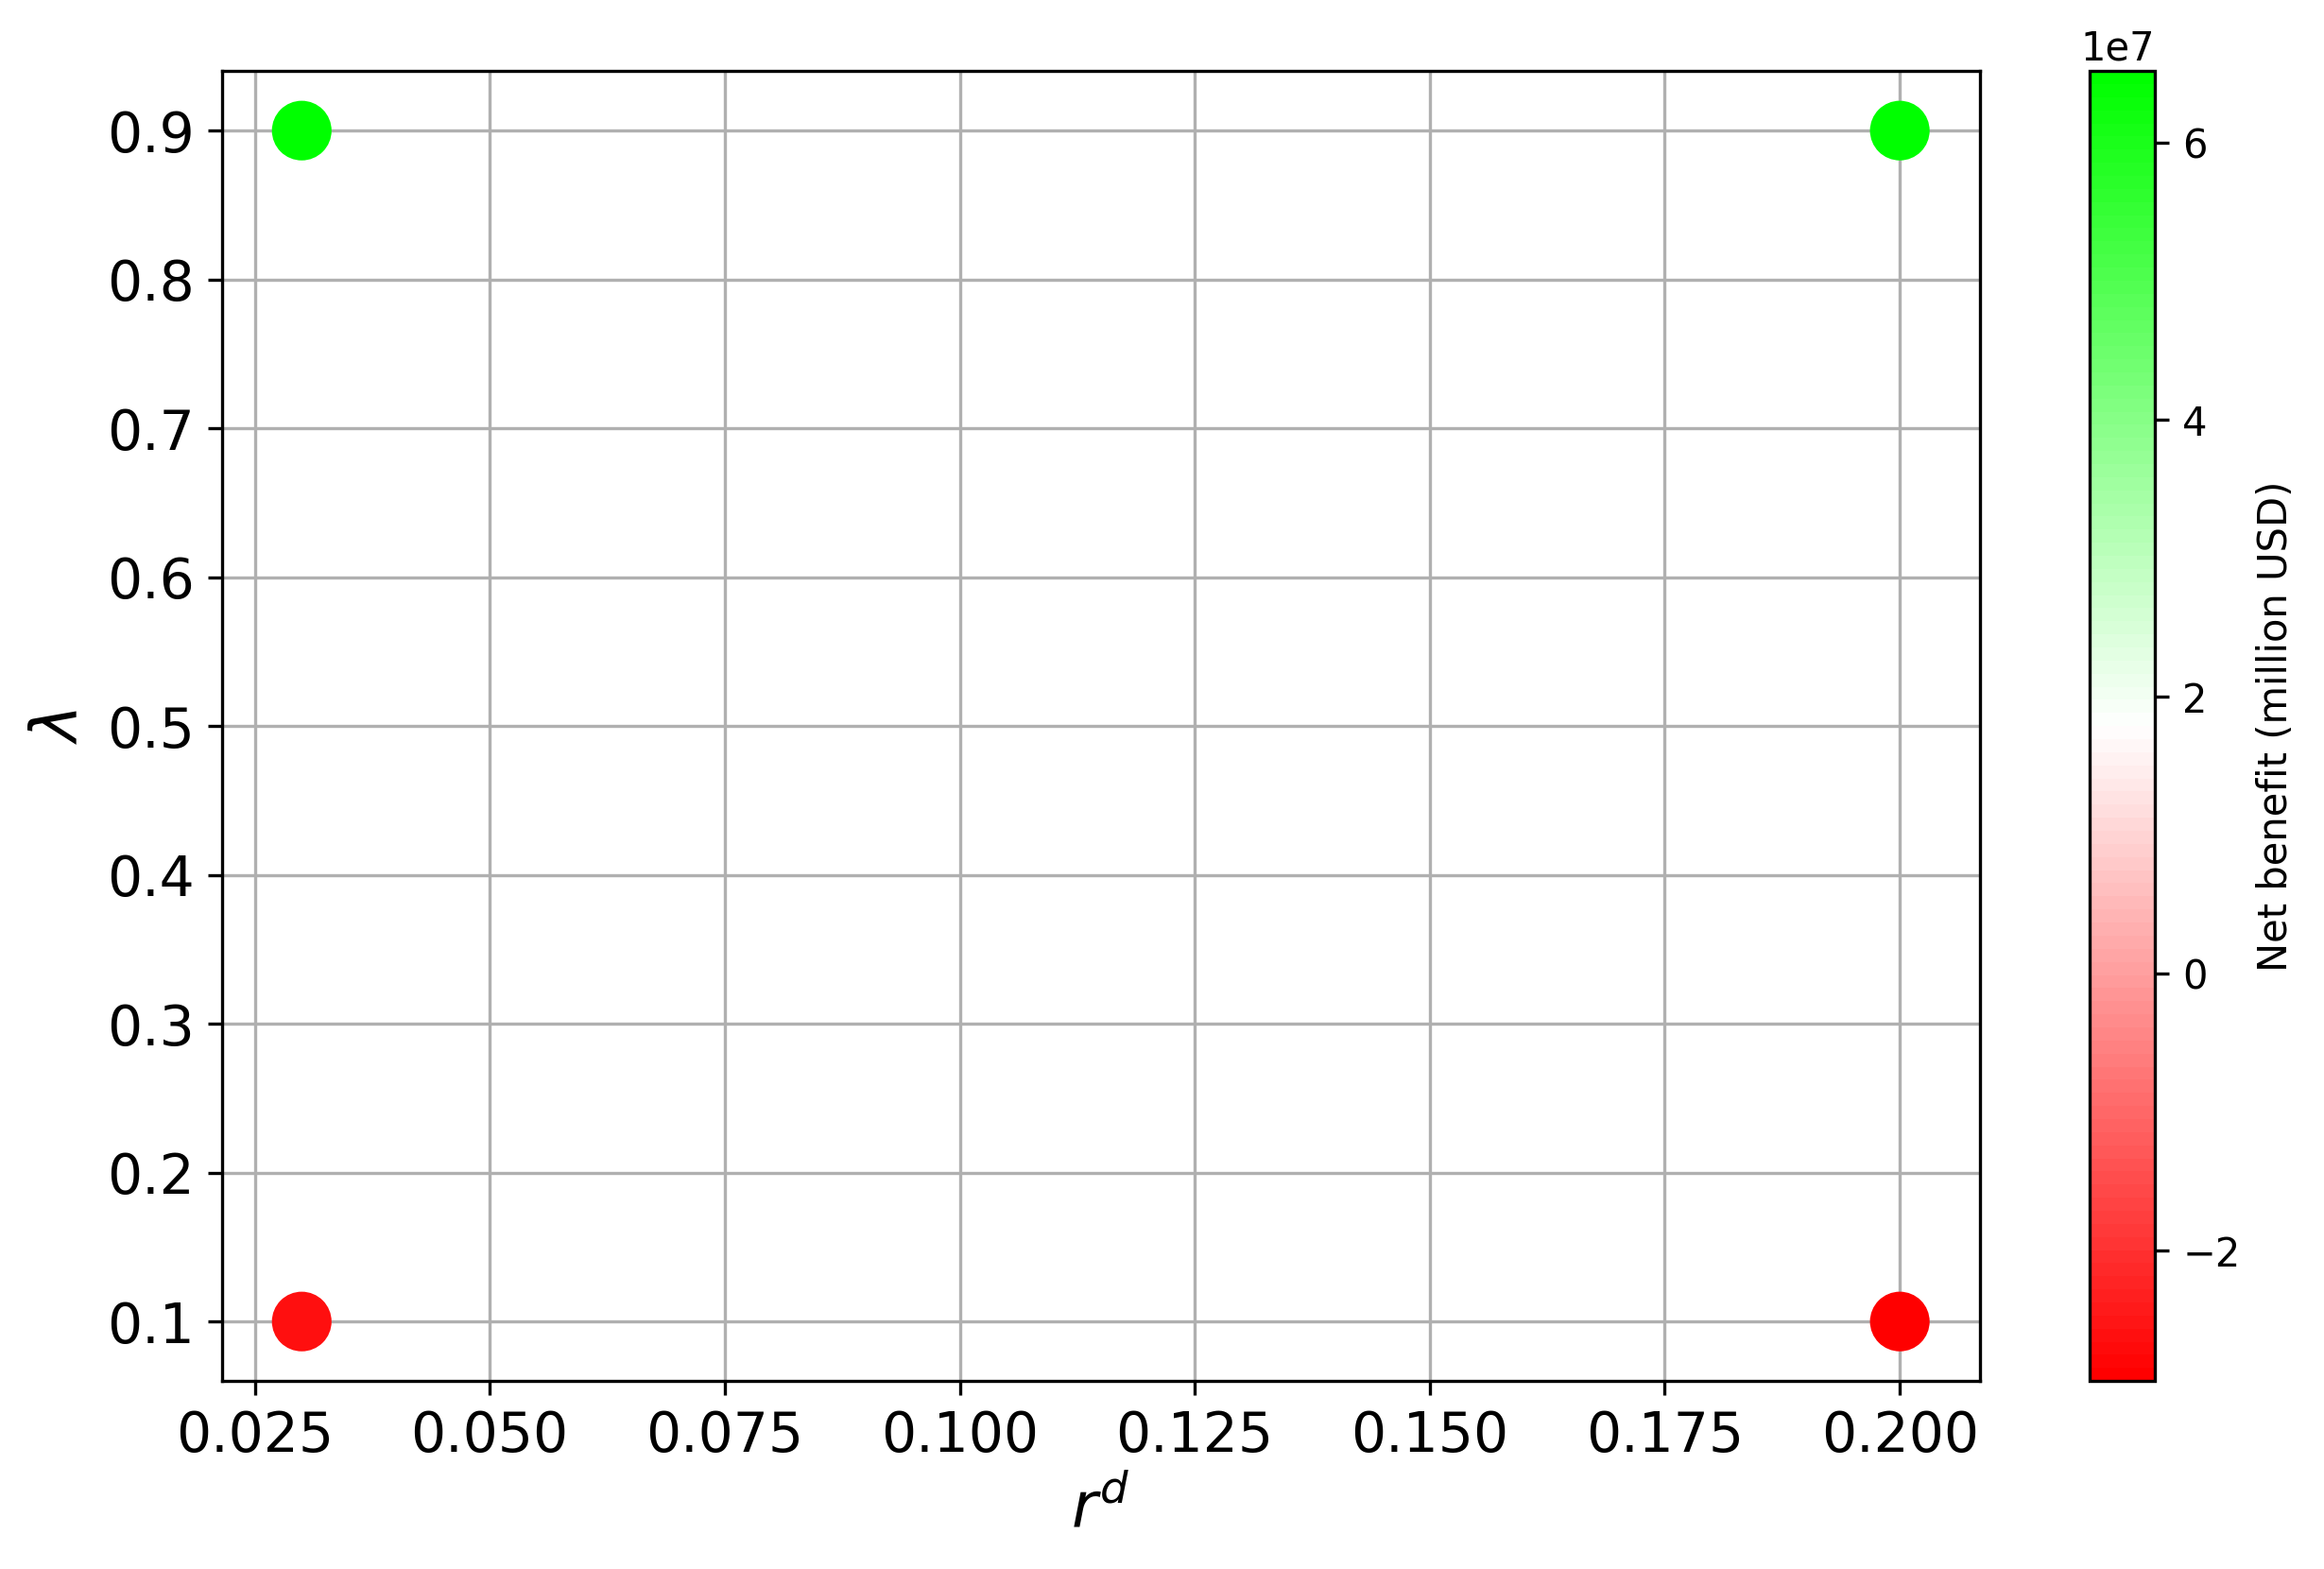

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FuncFormatter

# Base path to the CSV files
base_path = '../../results/outcomes/Sensitivity2/'

# List of (alpha, r) tuples
alpha_r_values = [(0.9, 0.03), (0.9, 0.2), (0.1, 0.2), (0.1, 0.03)]

# Dictionary to hold data
data = {}

# Read each CSV and extract the 'net_benefit' column for strategy 'JAA'
for alpha, r in alpha_r_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_alpha={alpha}_r={r}.csv"
    df = pd.read_csv(file_path)
    df.set_index('Strategy', inplace=True)
    net_benefit_jaa = df.loc['JAA', 'net_benefit']
    data[(1 - alpha, r)] = net_benefit_jaa

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(list(data.items()), columns=['lambda_r', 'net_benefit'])
combined_df[['lambda', 'r']] = pd.DataFrame(combined_df['lambda_r'].tolist(), index=combined_df.index)
combined_df.drop(columns='lambda_r', inplace=True)

# Function to format the y-axis tick labels as decimals
def decimal_formatter(x, pos):
    return f'{x:.1f}'

# Define the custom colormap from red to green
colors = [(1, 0, 0), (1, 1, 1), (0, 1, 0)]  # Red to white to green
n_bins = 100  # Discretize the colormap
cmap_name = 'red_white_green'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
scatter = plt.scatter(combined_df['r'], combined_df['lambda'], c=combined_df['net_benefit'], cmap=cm, s=200, zorder=3)
plt.colorbar(scatter, label='Net benefit (million USD)')

# Set y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(decimal_formatter))

plt.xlabel(r'$r^d$', fontsize=16)
plt.ylabel(r'$\lambda$', fontsize=16)

# Increase font size for x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True)

plt.show()


In [56]:
combined_df

net_benefit  lambda     r
0 -25636527.95     0.1  0.03
1 -29417827.20     0.1  0.20
2  65161013.97     0.9  0.20
3  65056694.20     0.9  0.03

## SAI_{B,0}

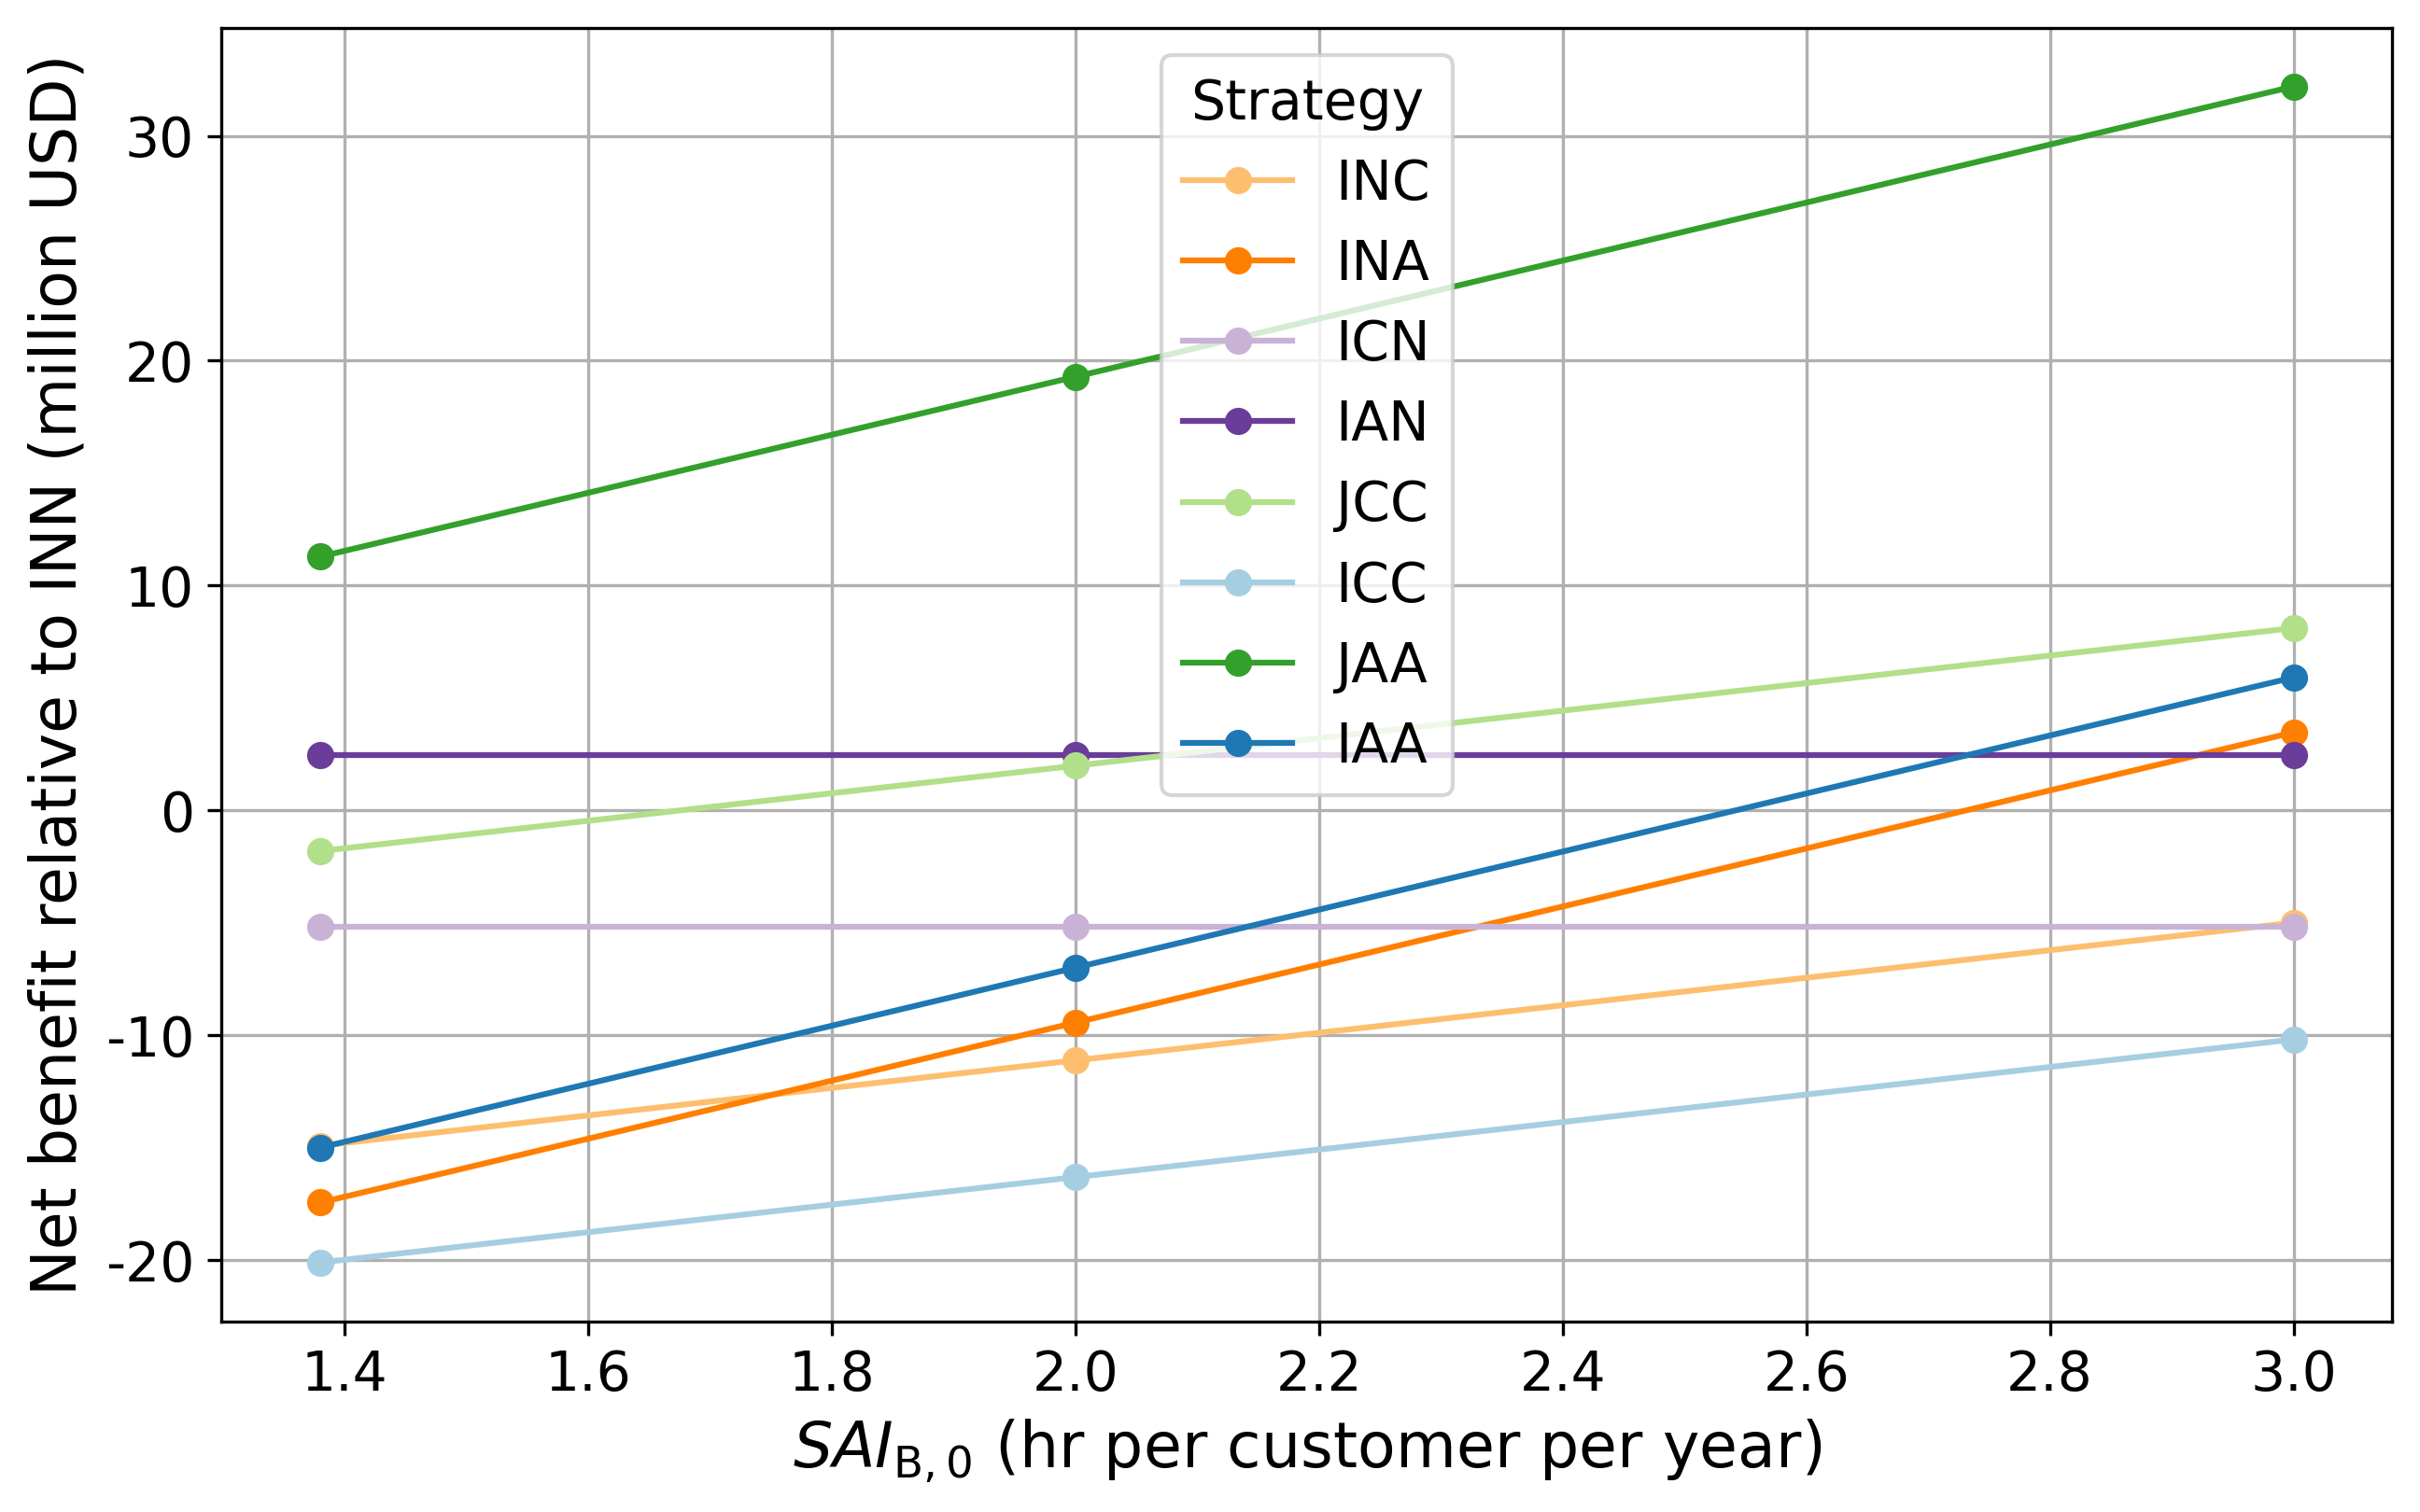

In [57]:
# Base path to the CSV files
#base_path = '../../results/outcomes/Sensitivity/'
base_path = '../../results/outcomes/Sensitivity2/'


# List of SAI_{B,0} values
sai_values = [1.38, 2, 3]

# Dictionary to hold data
data = {}

# Read each CSV and extract the 'net_benefit' column
for sai in sai_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_SAI_{{B,0}}={sai}.csv"
    df = pd.read_csv(file_path)
    df=df.loc[df['Strategy']!="INN"]
    # Make sure the strategy names are set as the index
    df.set_index('Strategy', inplace=True)
    data[sai] = df['net_benefit']

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(data)

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Function to format the y-axis tick labels as millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.0f}'

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
for strategy in combined_df.index:
    plt.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])


# Set y-axis formatter
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)    

plt.xlabel(r'$SAI_{\mathrm{B,0}}$ (hr per customer per year)', fontsize=16)
plt.ylabel('Net benefit relative to INN (million USD)', fontsize=16)

# Increase font size for x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
    
plt.legend(title='Strategy', title_fontsize=14, fontsize=14)

plt.grid(True)

plt.show()


## VLL_{E,R}

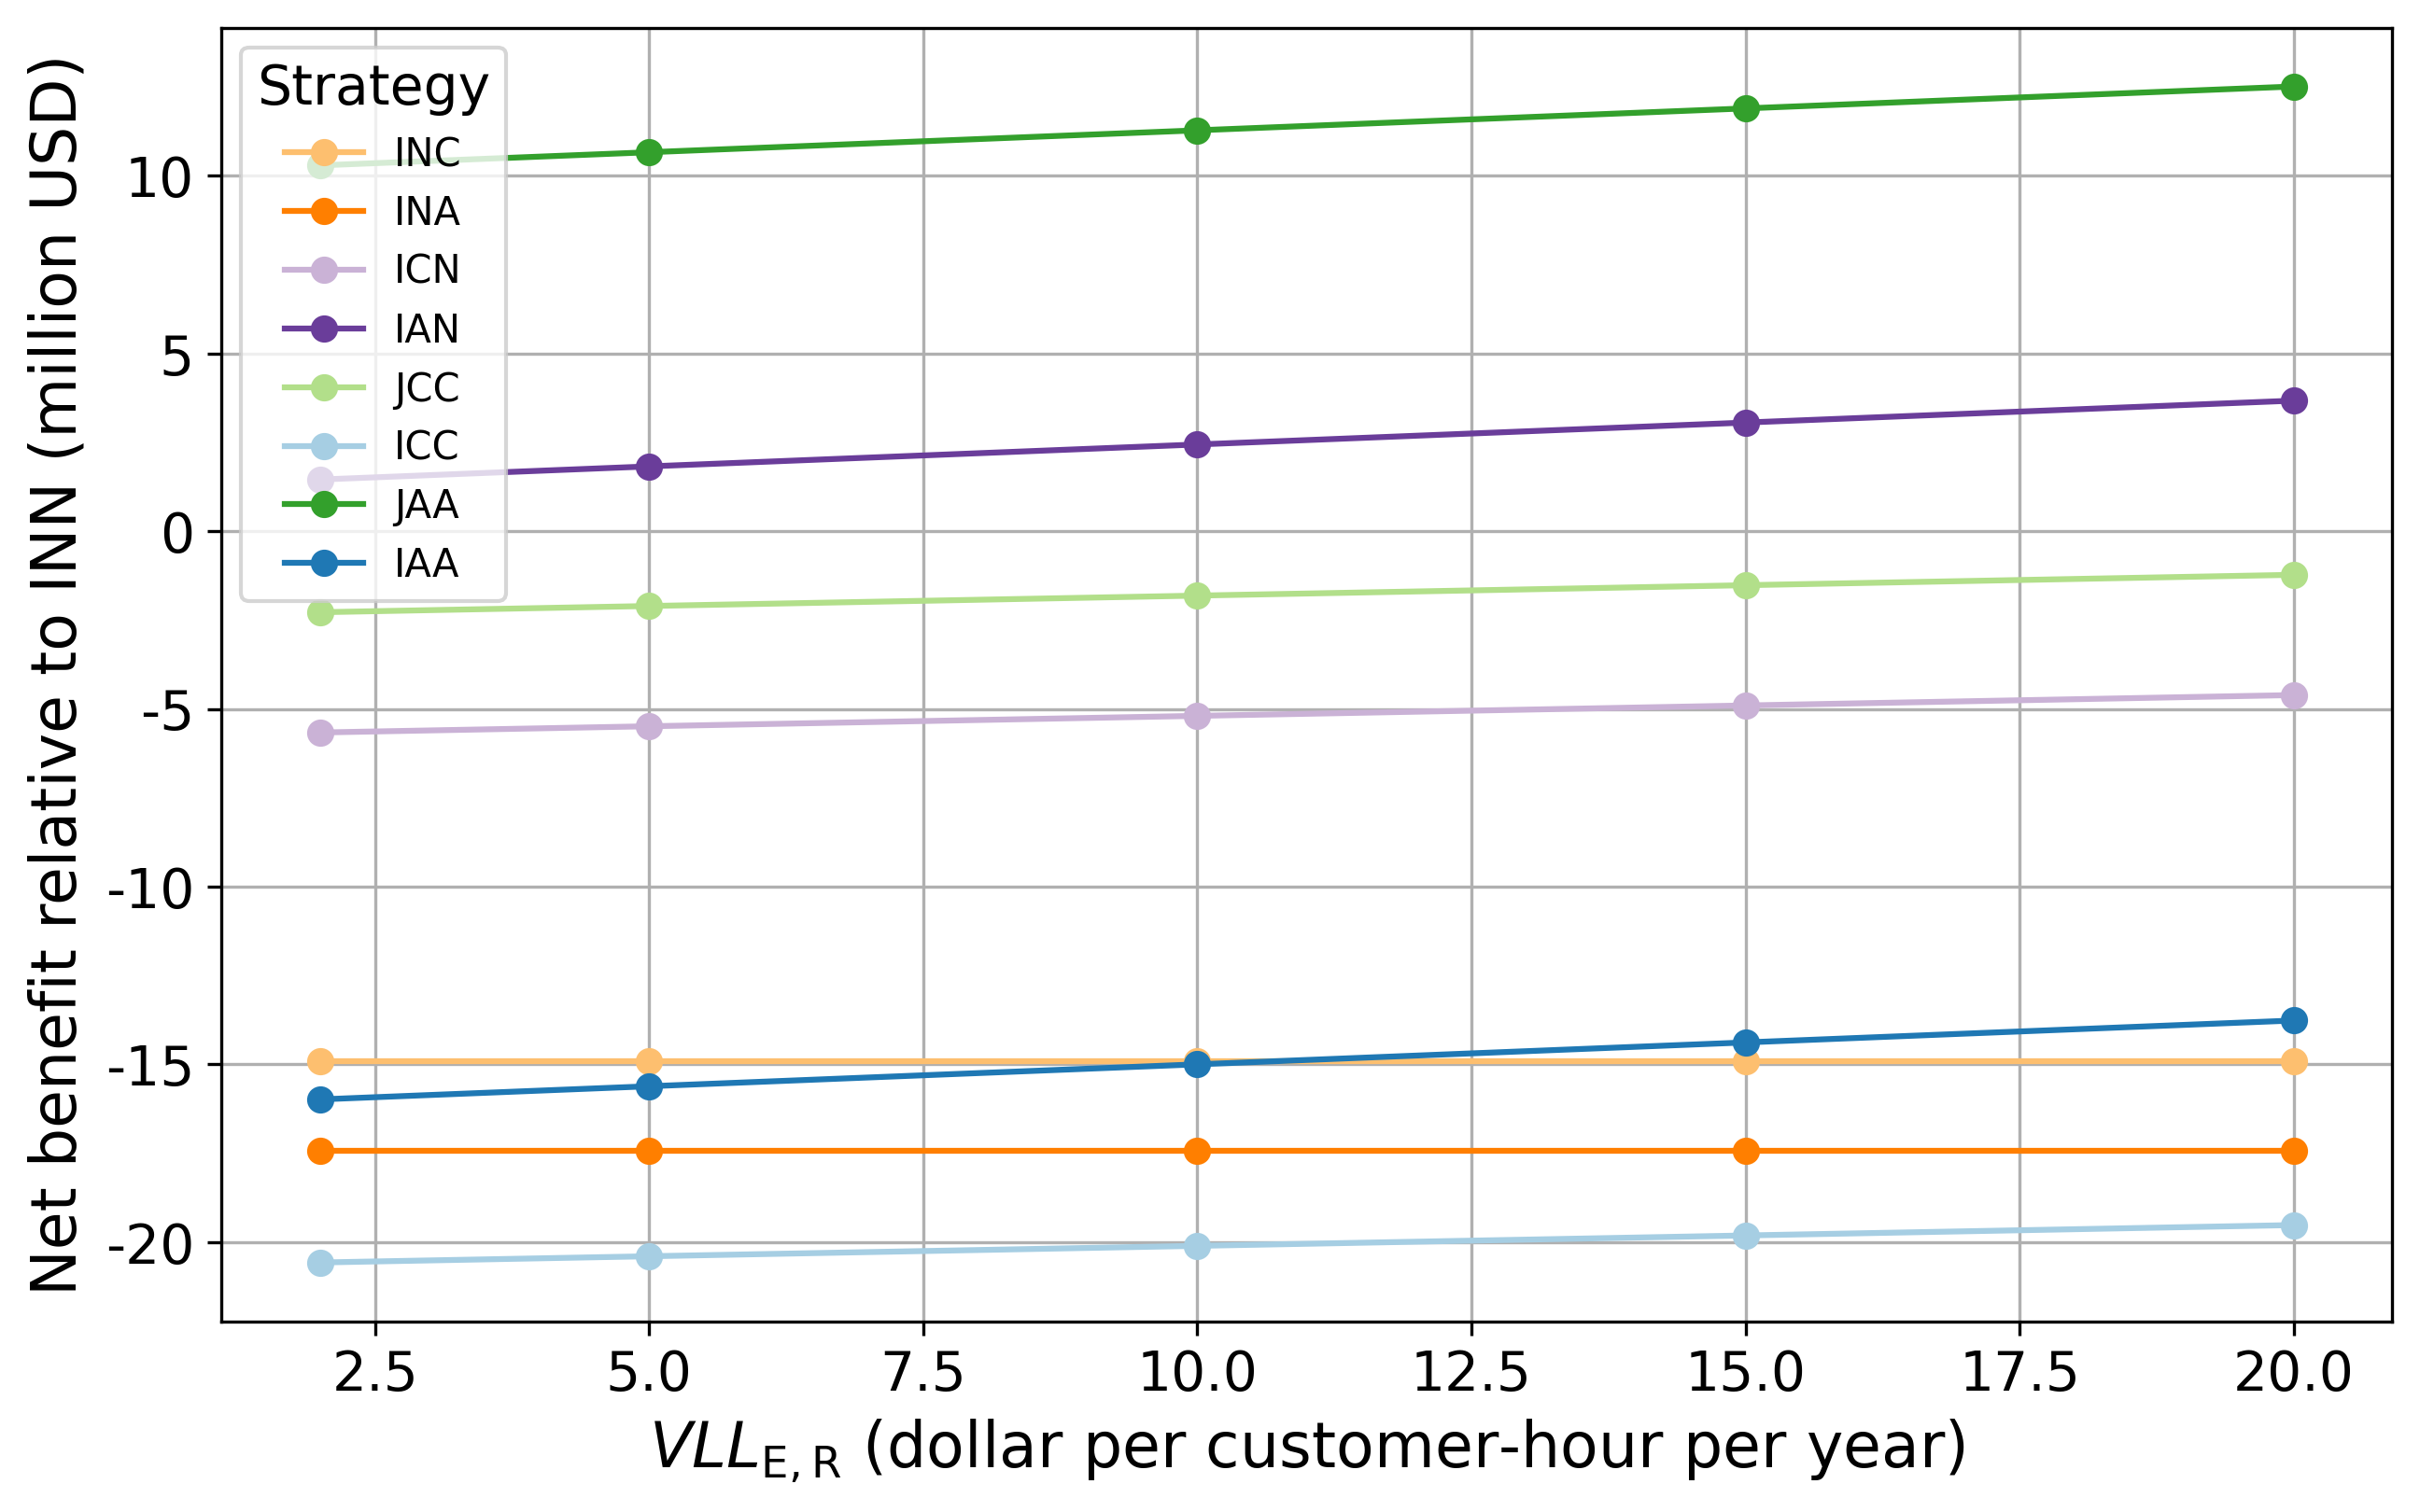

In [28]:
# List of VLL_{E,R} values
vll_values = [2, 5, 10, 15, 20]

# Dictionary to hold data
data = {}

# Read each CSV and extract the 'net_benefit' column
for vll in vll_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_vll_el_R_{vll}.csv"
    df = pd.read_csv(file_path)
    df=df.loc[df['Strategy']!="INN"]
    # Make sure the strategy names are set as the index
    df.set_index('Strategy', inplace=True)
    data[vll] = df['net_benefit']  # Change 'sai' to 'vll'

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(data)

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Function to format the y-axis tick labels as millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.0f}'

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
for strategy in combined_df.index:
    plt.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])

# Set y-axis formatter
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)        
    
plt.xlabel(r'$VLL_{\mathrm{E,R}}$ (dollar per customer-hour per year)', fontsize=16)
plt.ylabel('Net benefit relative to INN (million USD)', fontsize=16)

# Increase font size for x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.legend(title='Strategy', title_fontsize=14, fontsize=10)
plt.grid(True)

plt.show()

In [29]:
combined_df

2             5             10            15            20
Strategy                                                                      
INC      -1.491349e+07 -1.491349e+07 -1.491349e+07 -1.491349e+07 -1.491349e+07
INA      -1.744247e+07 -1.744247e+07 -1.744247e+07 -1.744247e+07 -1.744247e+07
ICN      -5.661348e+06 -5.485853e+06 -5.193360e+06 -4.900868e+06 -4.608375e+06
IAN       1.456905e+06  1.826883e+06  2.443513e+06  3.060143e+06  3.676773e+06
JCC      -2.277271e+06 -2.101775e+06 -1.809283e+06 -1.516790e+06 -1.224297e+06
ICC      -2.057484e+07 -2.039934e+07 -2.010685e+07 -1.981436e+07 -1.952187e+07
JAA       1.029682e+07  1.066680e+07  1.128343e+07  1.190006e+07  1.251669e+07
IAA      -1.598557e+07 -1.561559e+07 -1.499896e+07 -1.438233e+07 -1.376570e+07

## VLL_{B,R}

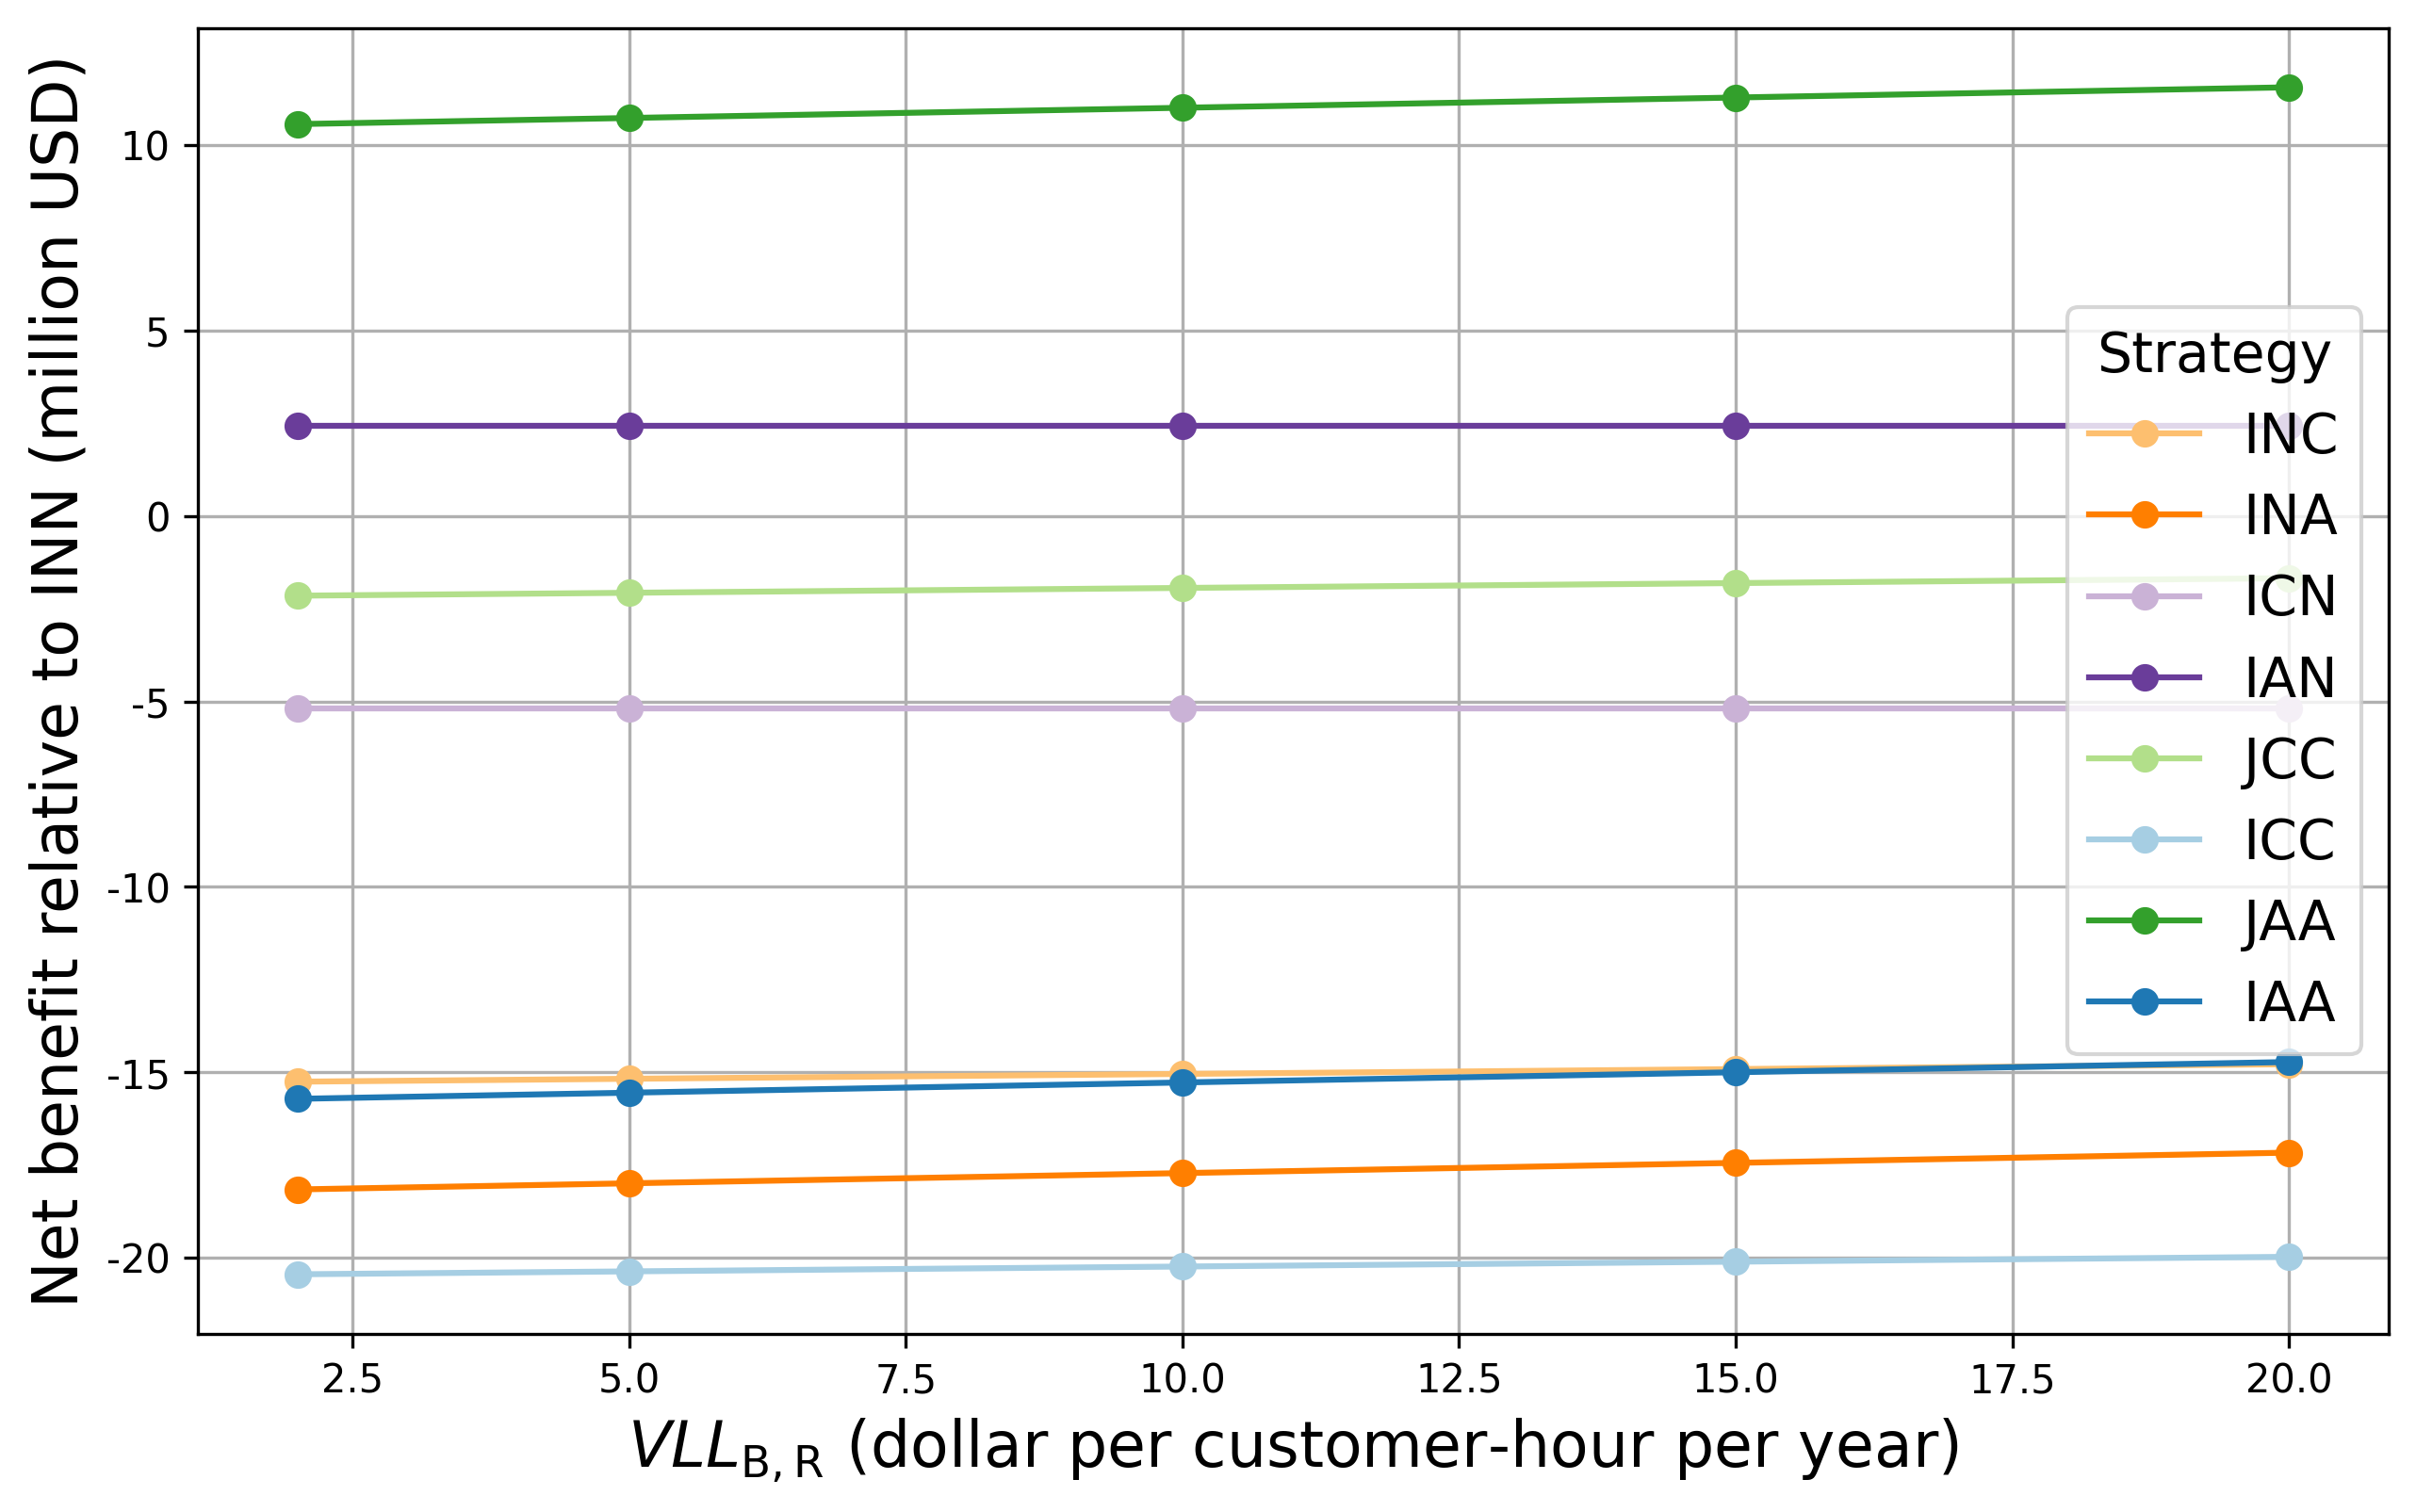

In [30]:
# List of VLL_{E,R} values
vll_values = [2, 5, 10, 15, 20]

# Dictionary to hold data
data = {}

# Read each CSV and extract the 'net_benefit' column
for vll in vll_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_vll_br_R_{vll}.csv"
    df = pd.read_csv(file_path)
    df=df.loc[df['Strategy']!="INN"]
    # Make sure the strategy names are set as the index
    df.set_index('Strategy', inplace=True)
    data[vll] = df['net_benefit']  # Change 'sai' to 'vll'

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(data)

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}


# Plotting
plt.figure(figsize=(10, 6), dpi=300)
for strategy in combined_df.index:
    plt.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
    
# Set y-axis formatter
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)   

plt.xlabel(r'$VLL_{\mathrm{B,R}}$ (dollar per customer-hour per year)', fontsize=16)
plt.ylabel('Net benefit relative to INN (million USD)', fontsize=16)
plt.legend(title='Strategy', title_fontsize=14, fontsize=14)
plt.grid(True)

plt.show()

In [31]:
combined_df

2             5             10            15            20
Strategy                                                                      
INC      -1.525350e+07 -1.517504e+07 -1.504426e+07 -1.491349e+07 -1.478272e+07
INA      -1.815929e+07 -1.799387e+07 -1.771817e+07 -1.744247e+07 -1.716678e+07
ICN      -5.193360e+06 -5.193360e+06 -5.193360e+06 -5.193360e+06 -5.193360e+06
IAN       2.443513e+06  2.443513e+06  2.443513e+06  2.443513e+06  2.443513e+06
JCC      -2.149295e+06 -2.070831e+06 -1.940057e+06 -1.809283e+06 -1.678509e+06
ICC      -2.044686e+07 -2.036840e+07 -2.023762e+07 -2.010685e+07 -1.997608e+07
JAA       1.056662e+07  1.073204e+07  1.100773e+07  1.128343e+07  1.155913e+07
IAA      -1.571577e+07 -1.555035e+07 -1.527466e+07 -1.499896e+07 -1.472326e+07

## r

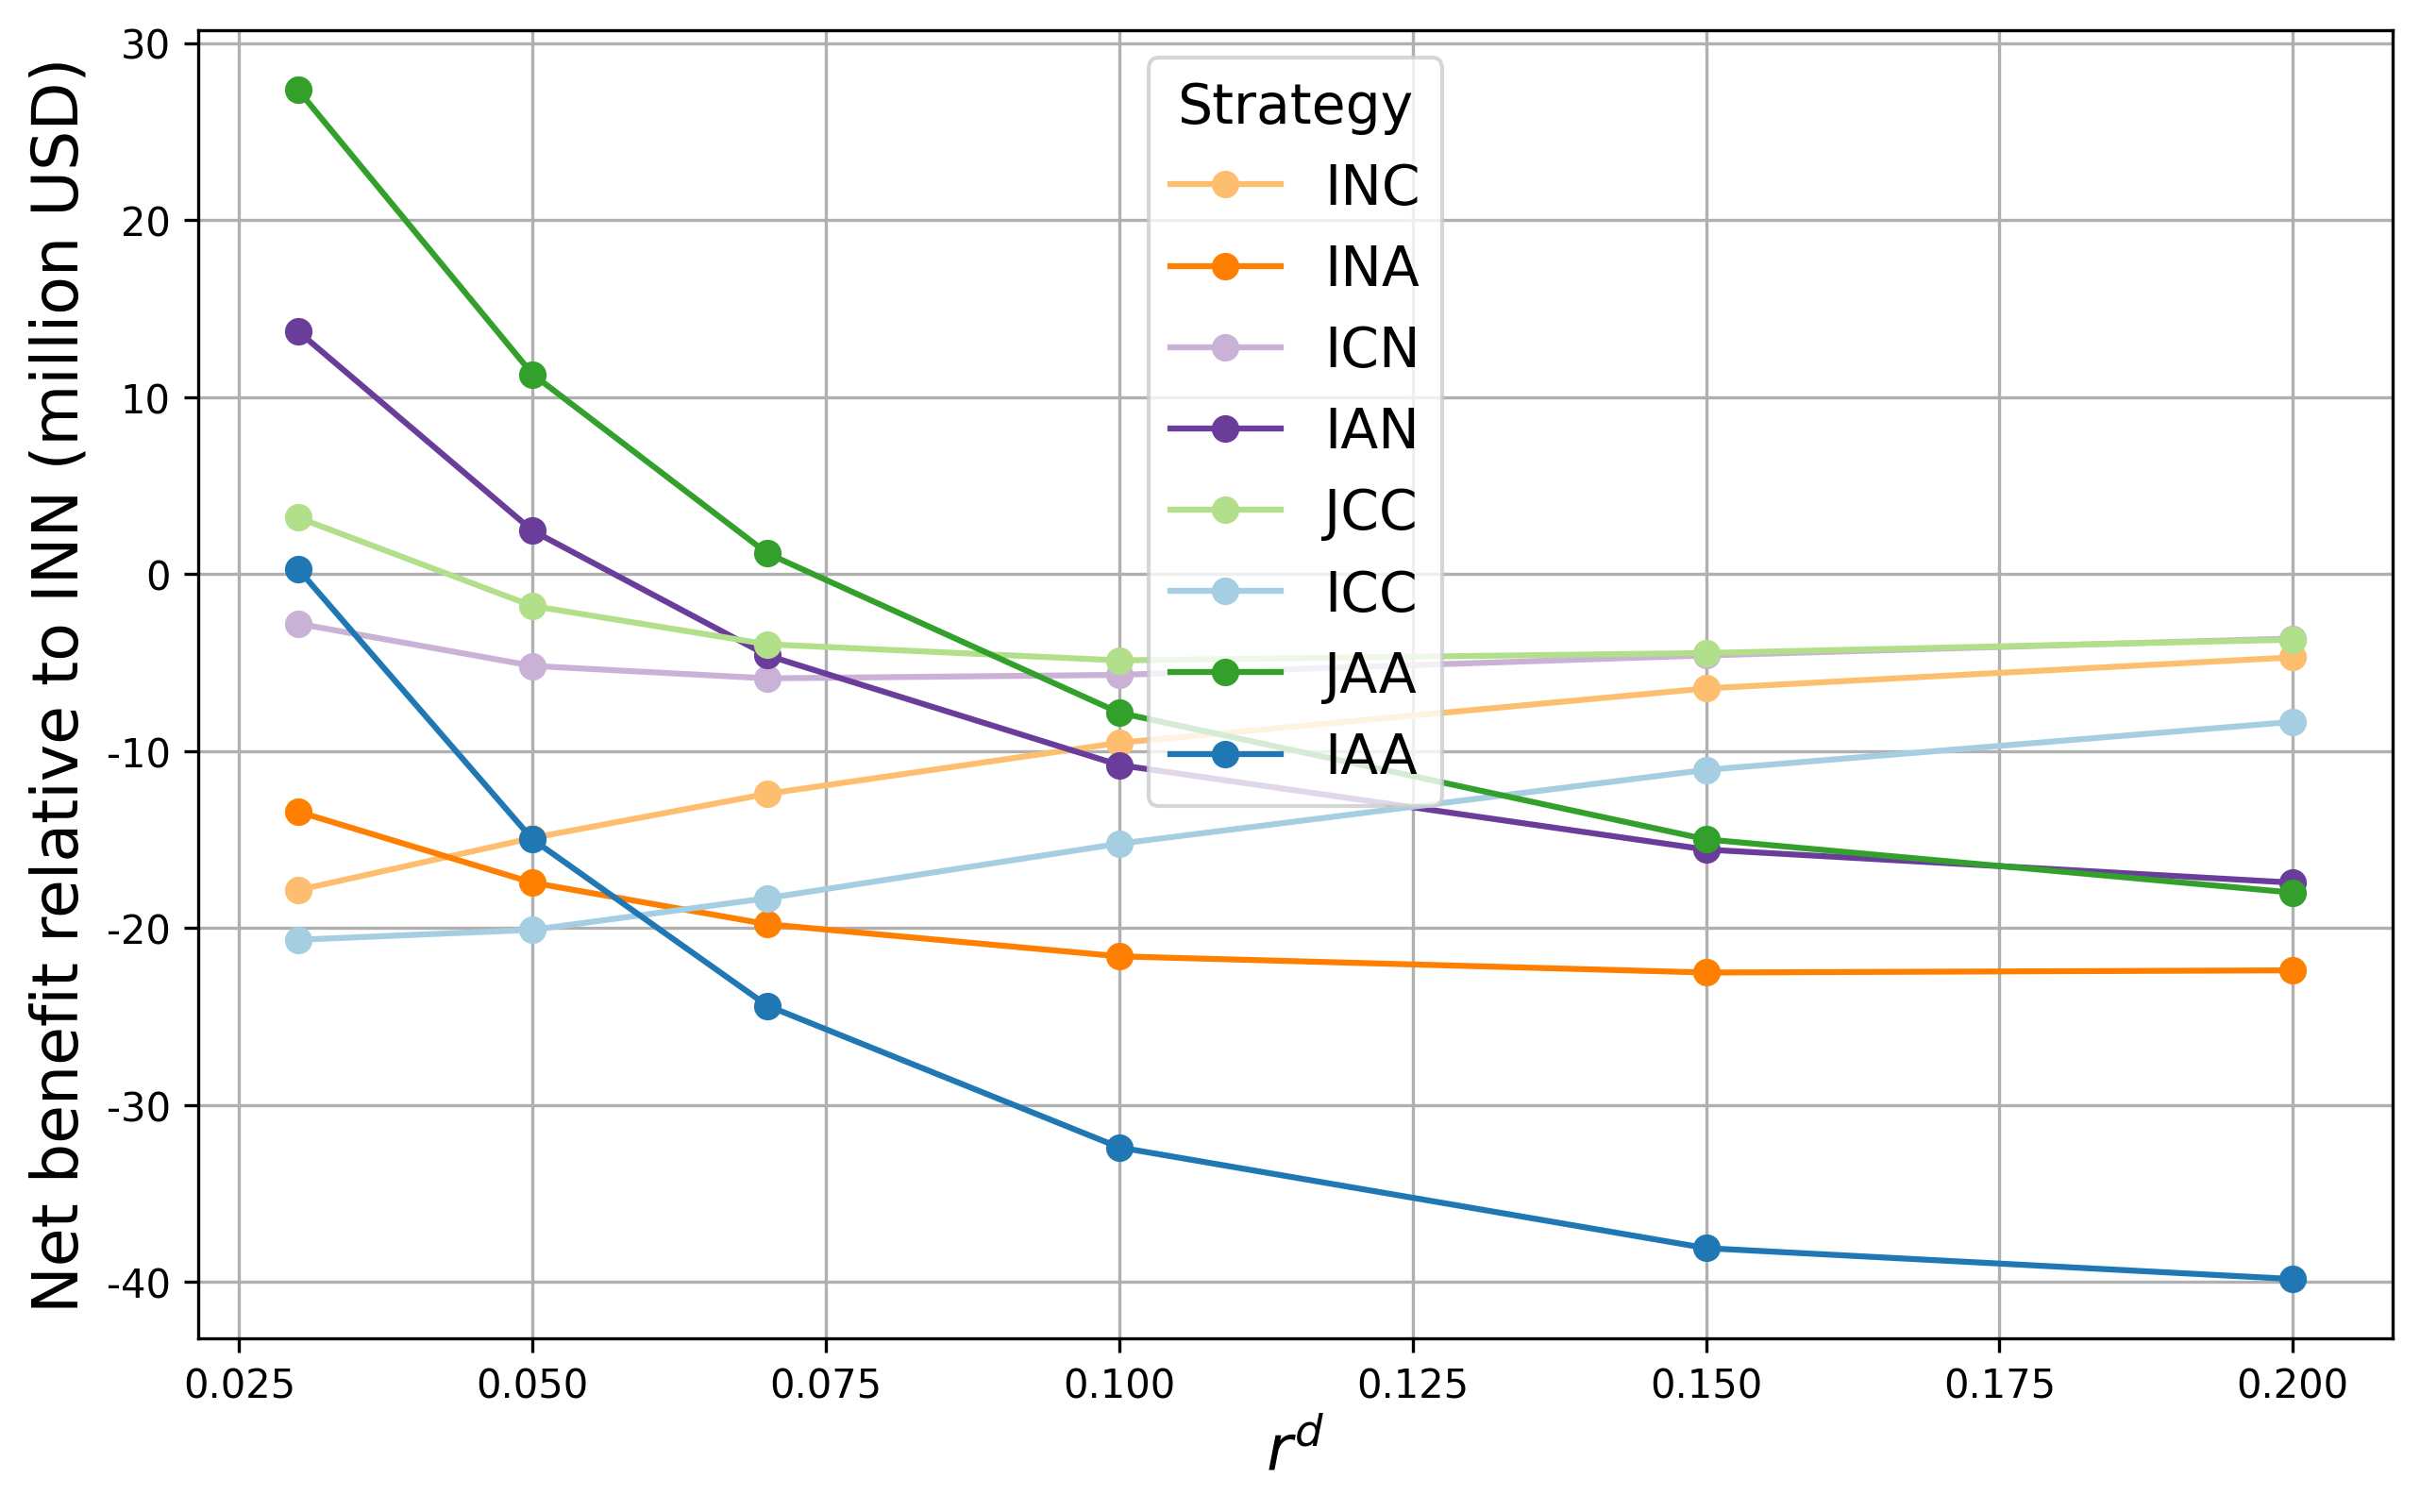

In [32]:
# List of r values
r_values = [0.03,0.05,0.07,0.1,0.15,0.2]

# Dictionary to hold data
data = {}

# Read each CSV and extract the 'net_benefit' column
for r in r_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_r={r}.csv"
    df = pd.read_csv(file_path)
    df=df.loc[df['Strategy']!="INN"]
    # Make sure the strategy names are set as the index
    df.set_index('Strategy', inplace=True)
    data[r] = df['net_benefit']

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(data)

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
for strategy in combined_df.index:
    plt.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])

# Set y-axis formatter
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)   

plt.xlabel(r'$r^d$', fontsize=16)
plt.ylabel('Net benefit relative to INN (million USD)', fontsize=16)
plt.legend(title='Strategy', title_fontsize=14, fontsize=14)
plt.grid(True)

plt.show()


## plf

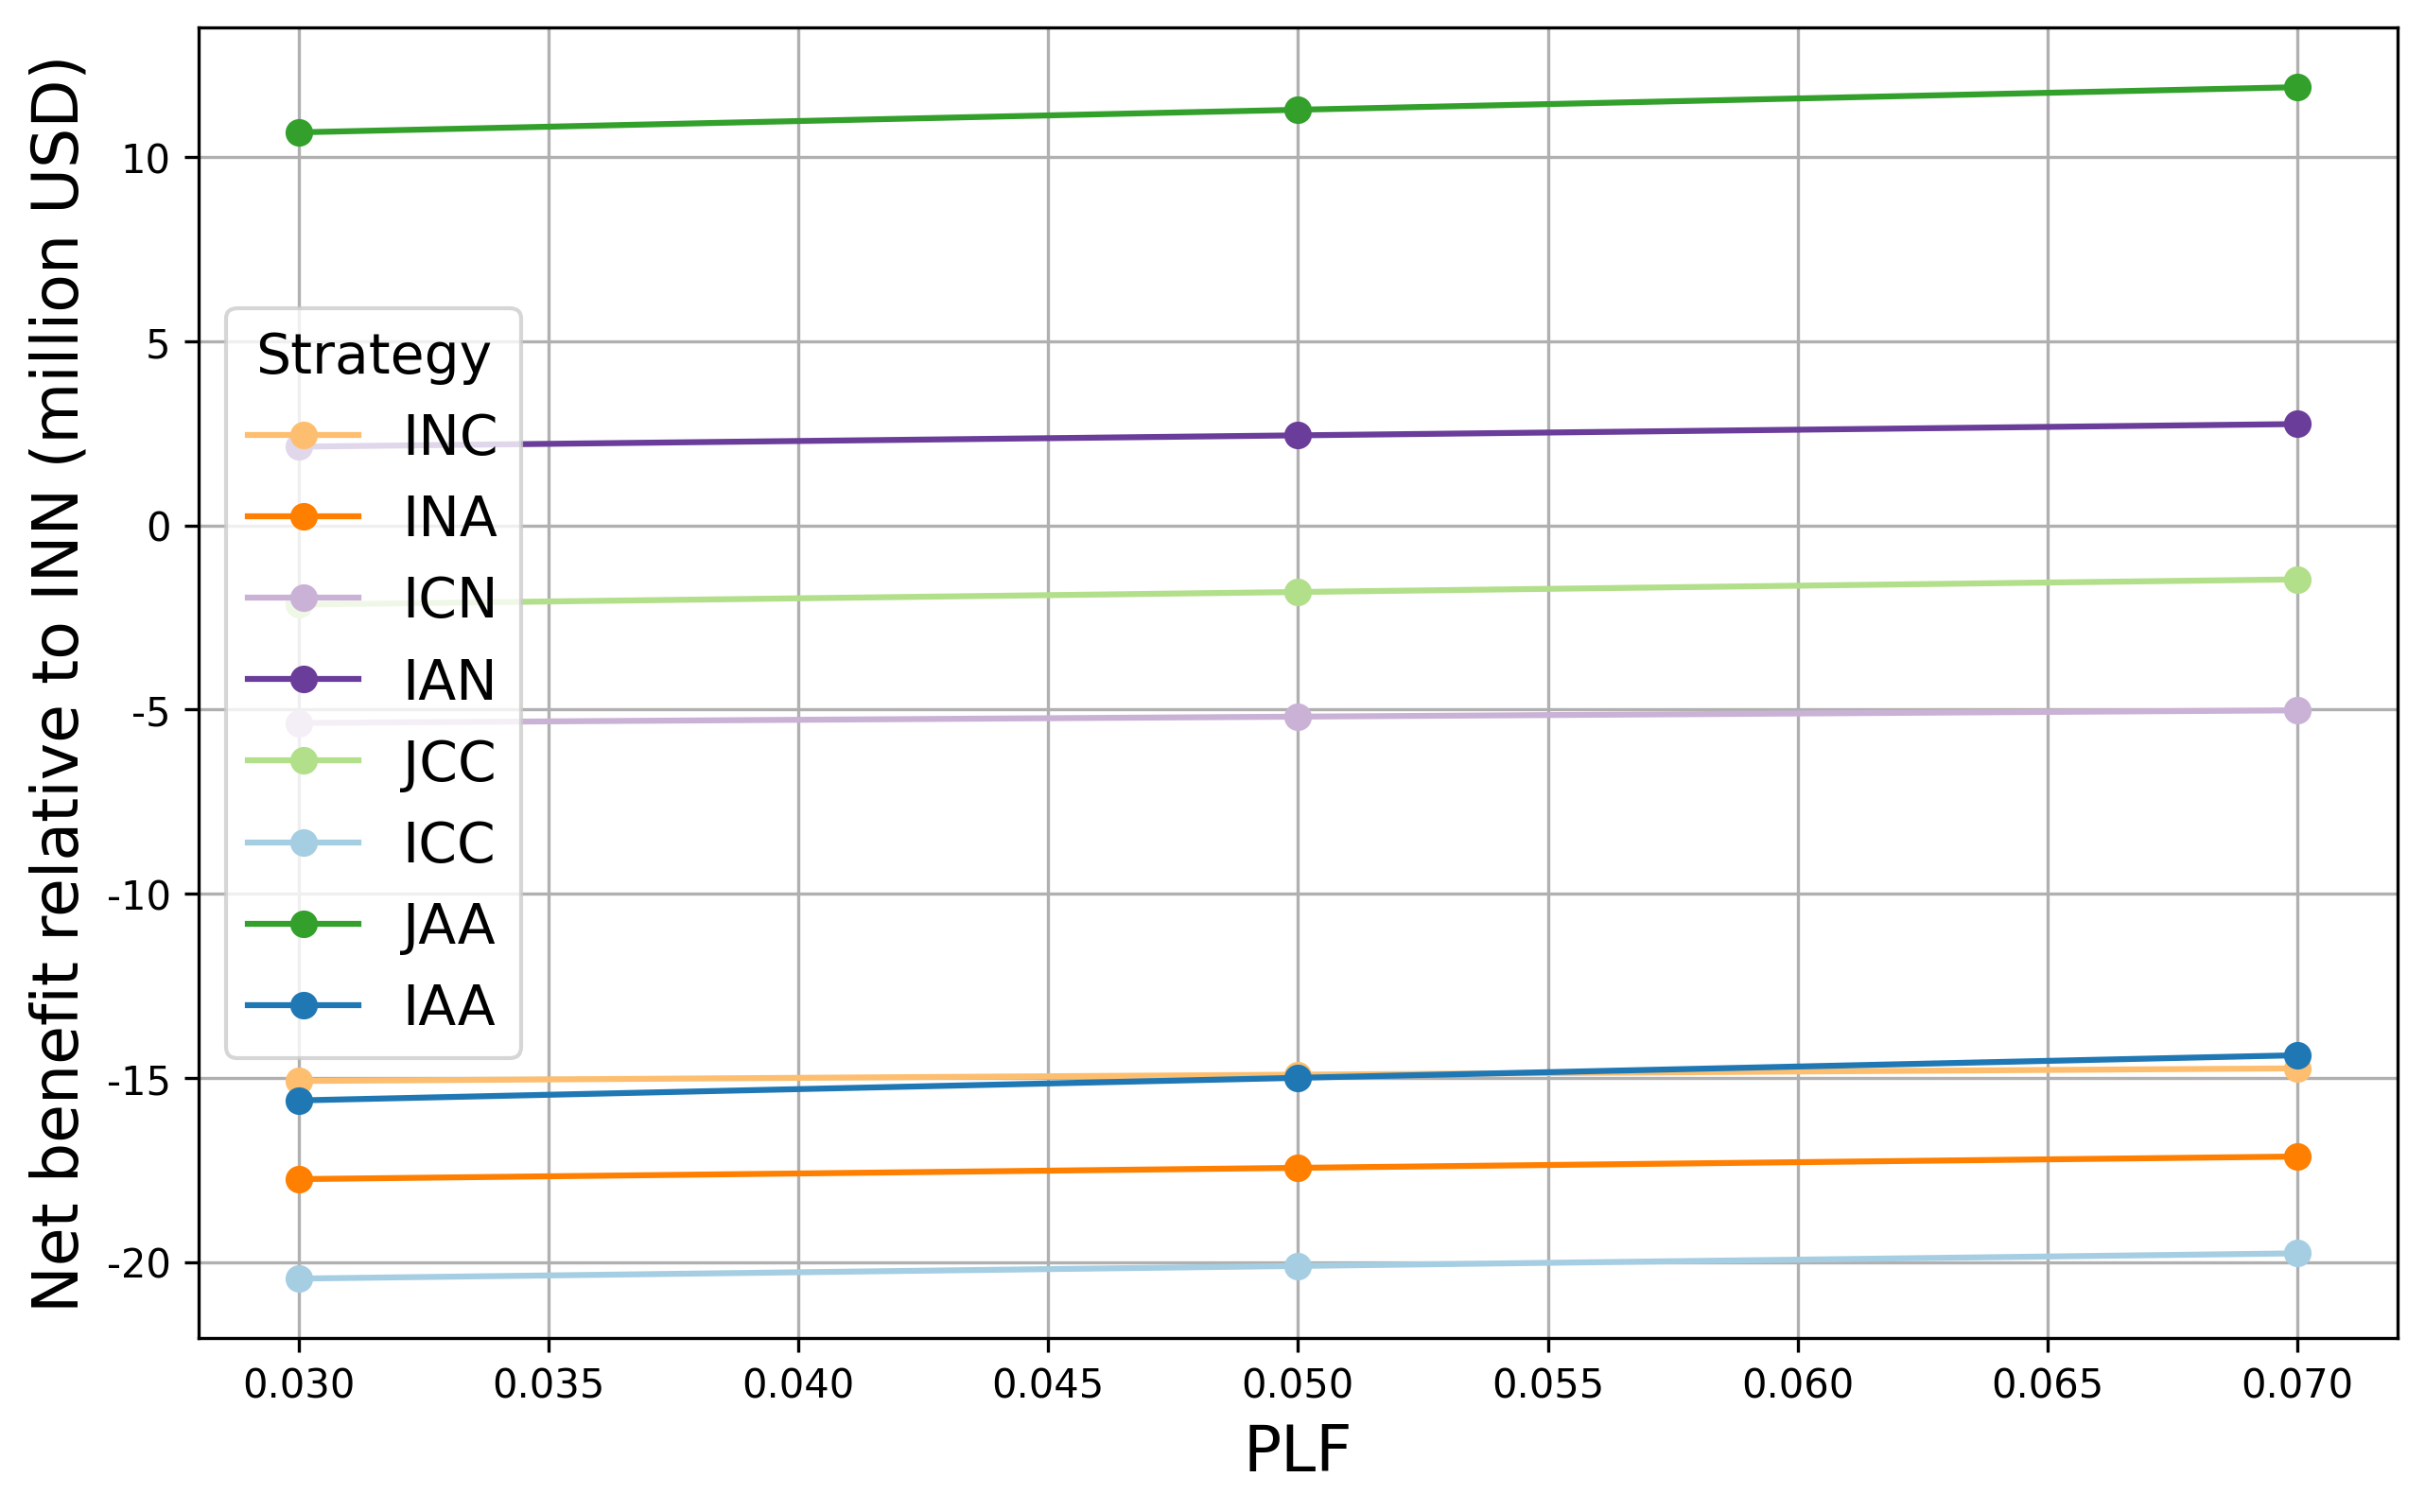

In [33]:
# Base path to the CSV files
base_path = '../../results/outcomes/Sensitivity2/'

# List of r values
plf_values = [0.03,0.05,0.07]

# Dictionary to hold data
data = {}

# Read each CSV and extract the 'net_benefit' column
for plf in plf_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_plf={plf}.csv"
    df = pd.read_csv(file_path)
    df=df.loc[df['Strategy']!="INN"]
    # Make sure the strategy names are set as the index
    df.set_index('Strategy', inplace=True)
    data[plf] = df['net_benefit']

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(data)

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
for strategy in combined_df.index:
    plt.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])

# Set y-axis formatter
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter) 
    
plt.xlabel('PLF', fontsize=16)
plt.ylabel('Net benefit relative to INN (million USD)', fontsize=16)
plt.legend(title='Strategy', title_fontsize=14, fontsize=14)
plt.grid(True)

plt.show()


In [34]:
combined_df

0.03          0.05          0.07
Strategy                                          
INC      -1.508488e+07 -1.491349e+07 -1.474210e+07
INA      -1.774925e+07 -1.744247e+07 -1.713570e+07
ICN      -5.364753e+06 -5.193360e+06 -5.021967e+06
IAN       2.136736e+06  2.443513e+06  2.750290e+06
JCC      -2.152069e+06 -1.809283e+06 -1.466497e+06
ICC      -2.044964e+07 -2.010685e+07 -1.976406e+07
JAA       1.066988e+07  1.128343e+07  1.189698e+07
IAA      -1.561252e+07 -1.499896e+07 -1.438541e+07

## r^{avjt}: Avoided co-deployment conversion cost rate

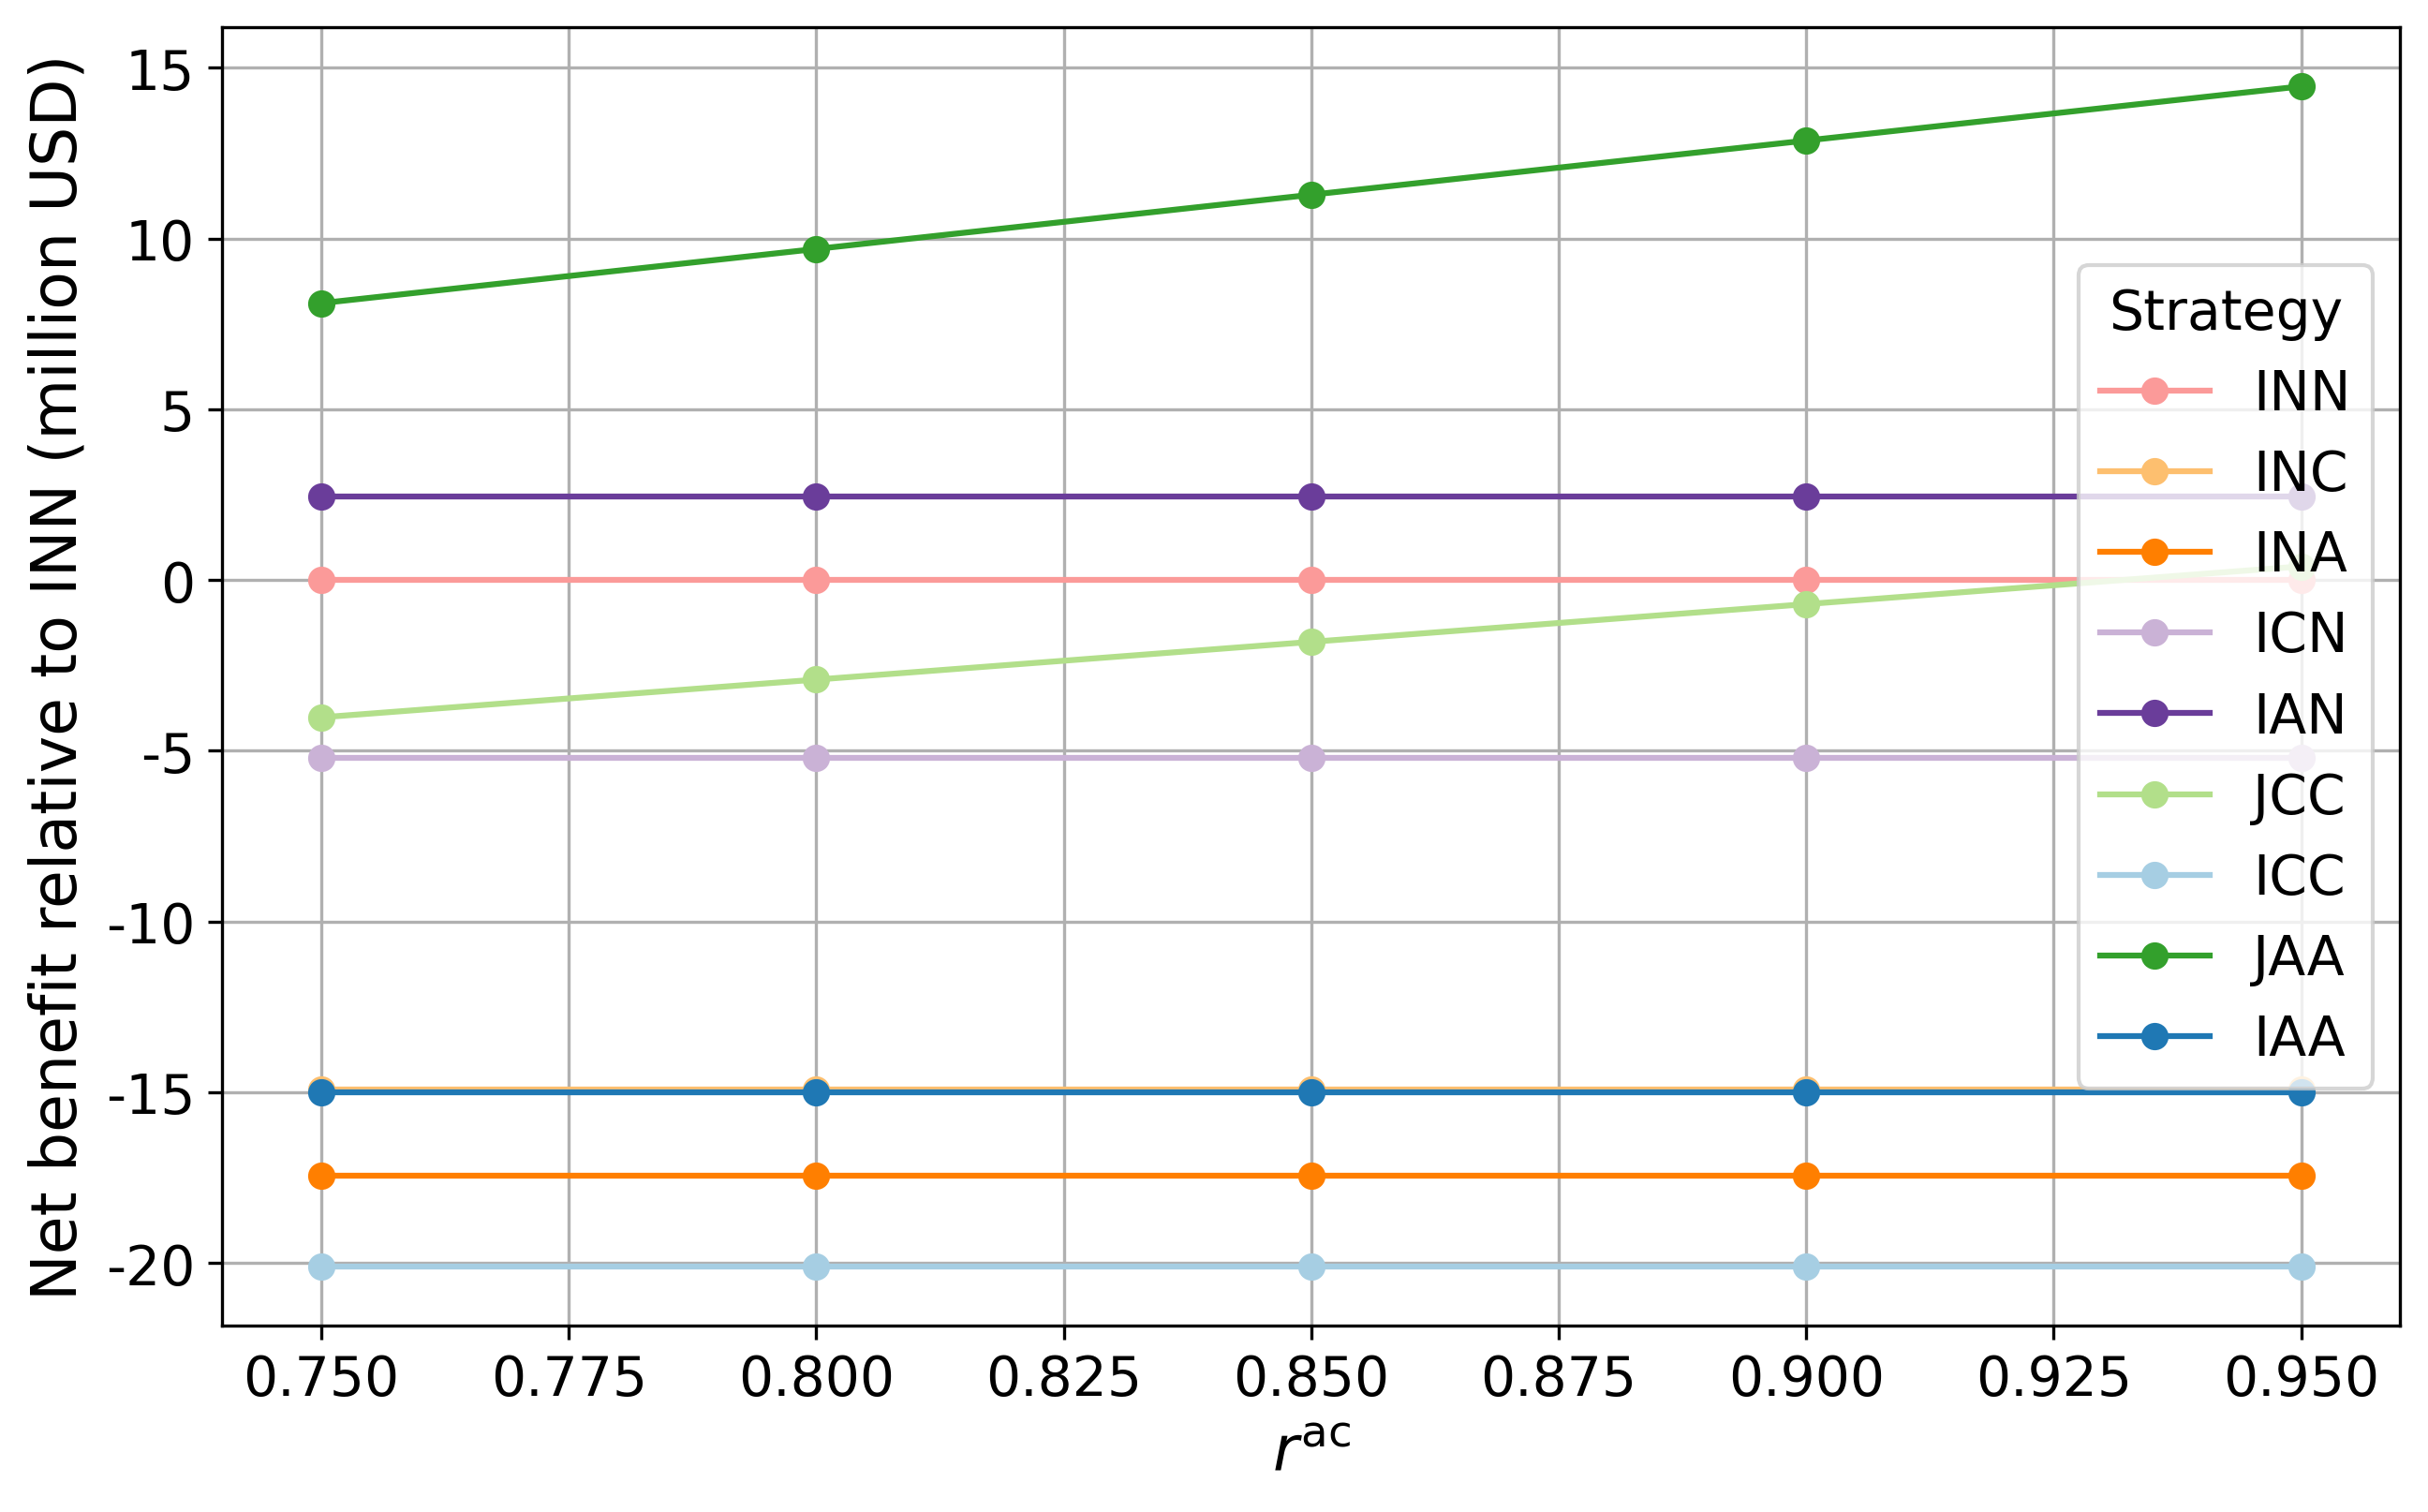

In [60]:
# List of r values
saving_values = [0.05, 0.1, 0.15, 0.2, 0.25]

# Dictionary to hold data
data = {}

# Read each CSV and extract the 'net_benefit' column
for saving in saving_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_cost_saving={saving}.csv"
    df = pd.read_csv(file_path)
    #df=df.loc[df['Strategy']!="INN"]
    #df=df.loc[df['Strategy']!="INC"]
    #df=df.loc[df['Strategy']!="INA"]
    #df=df.loc[df['Strategy']!="ICN"]
    #df=df.loc[df['Strategy']!="IAN"]
    #df=df.loc[df['Strategy']!="ICC"]
    #df=df.loc[df['Strategy']!="IAA"]
    # Make sure the strategy names are set as the index
    df.set_index('Strategy', inplace=True)
    data[1-saving] = df['net_benefit']

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(data)

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
for strategy in combined_df.index:
    plt.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])

# Set y-axis formatter
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter) 
    
plt.xlabel(r'$r^{\mathrm{ac}}$', fontsize=16)
plt.ylabel('Net benefit relative to INN (million USD)', fontsize=16)

# Increase font size for x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Strategy', title_fontsize=14, fontsize=14)
plt.grid(True)

plt.show()


## alpha

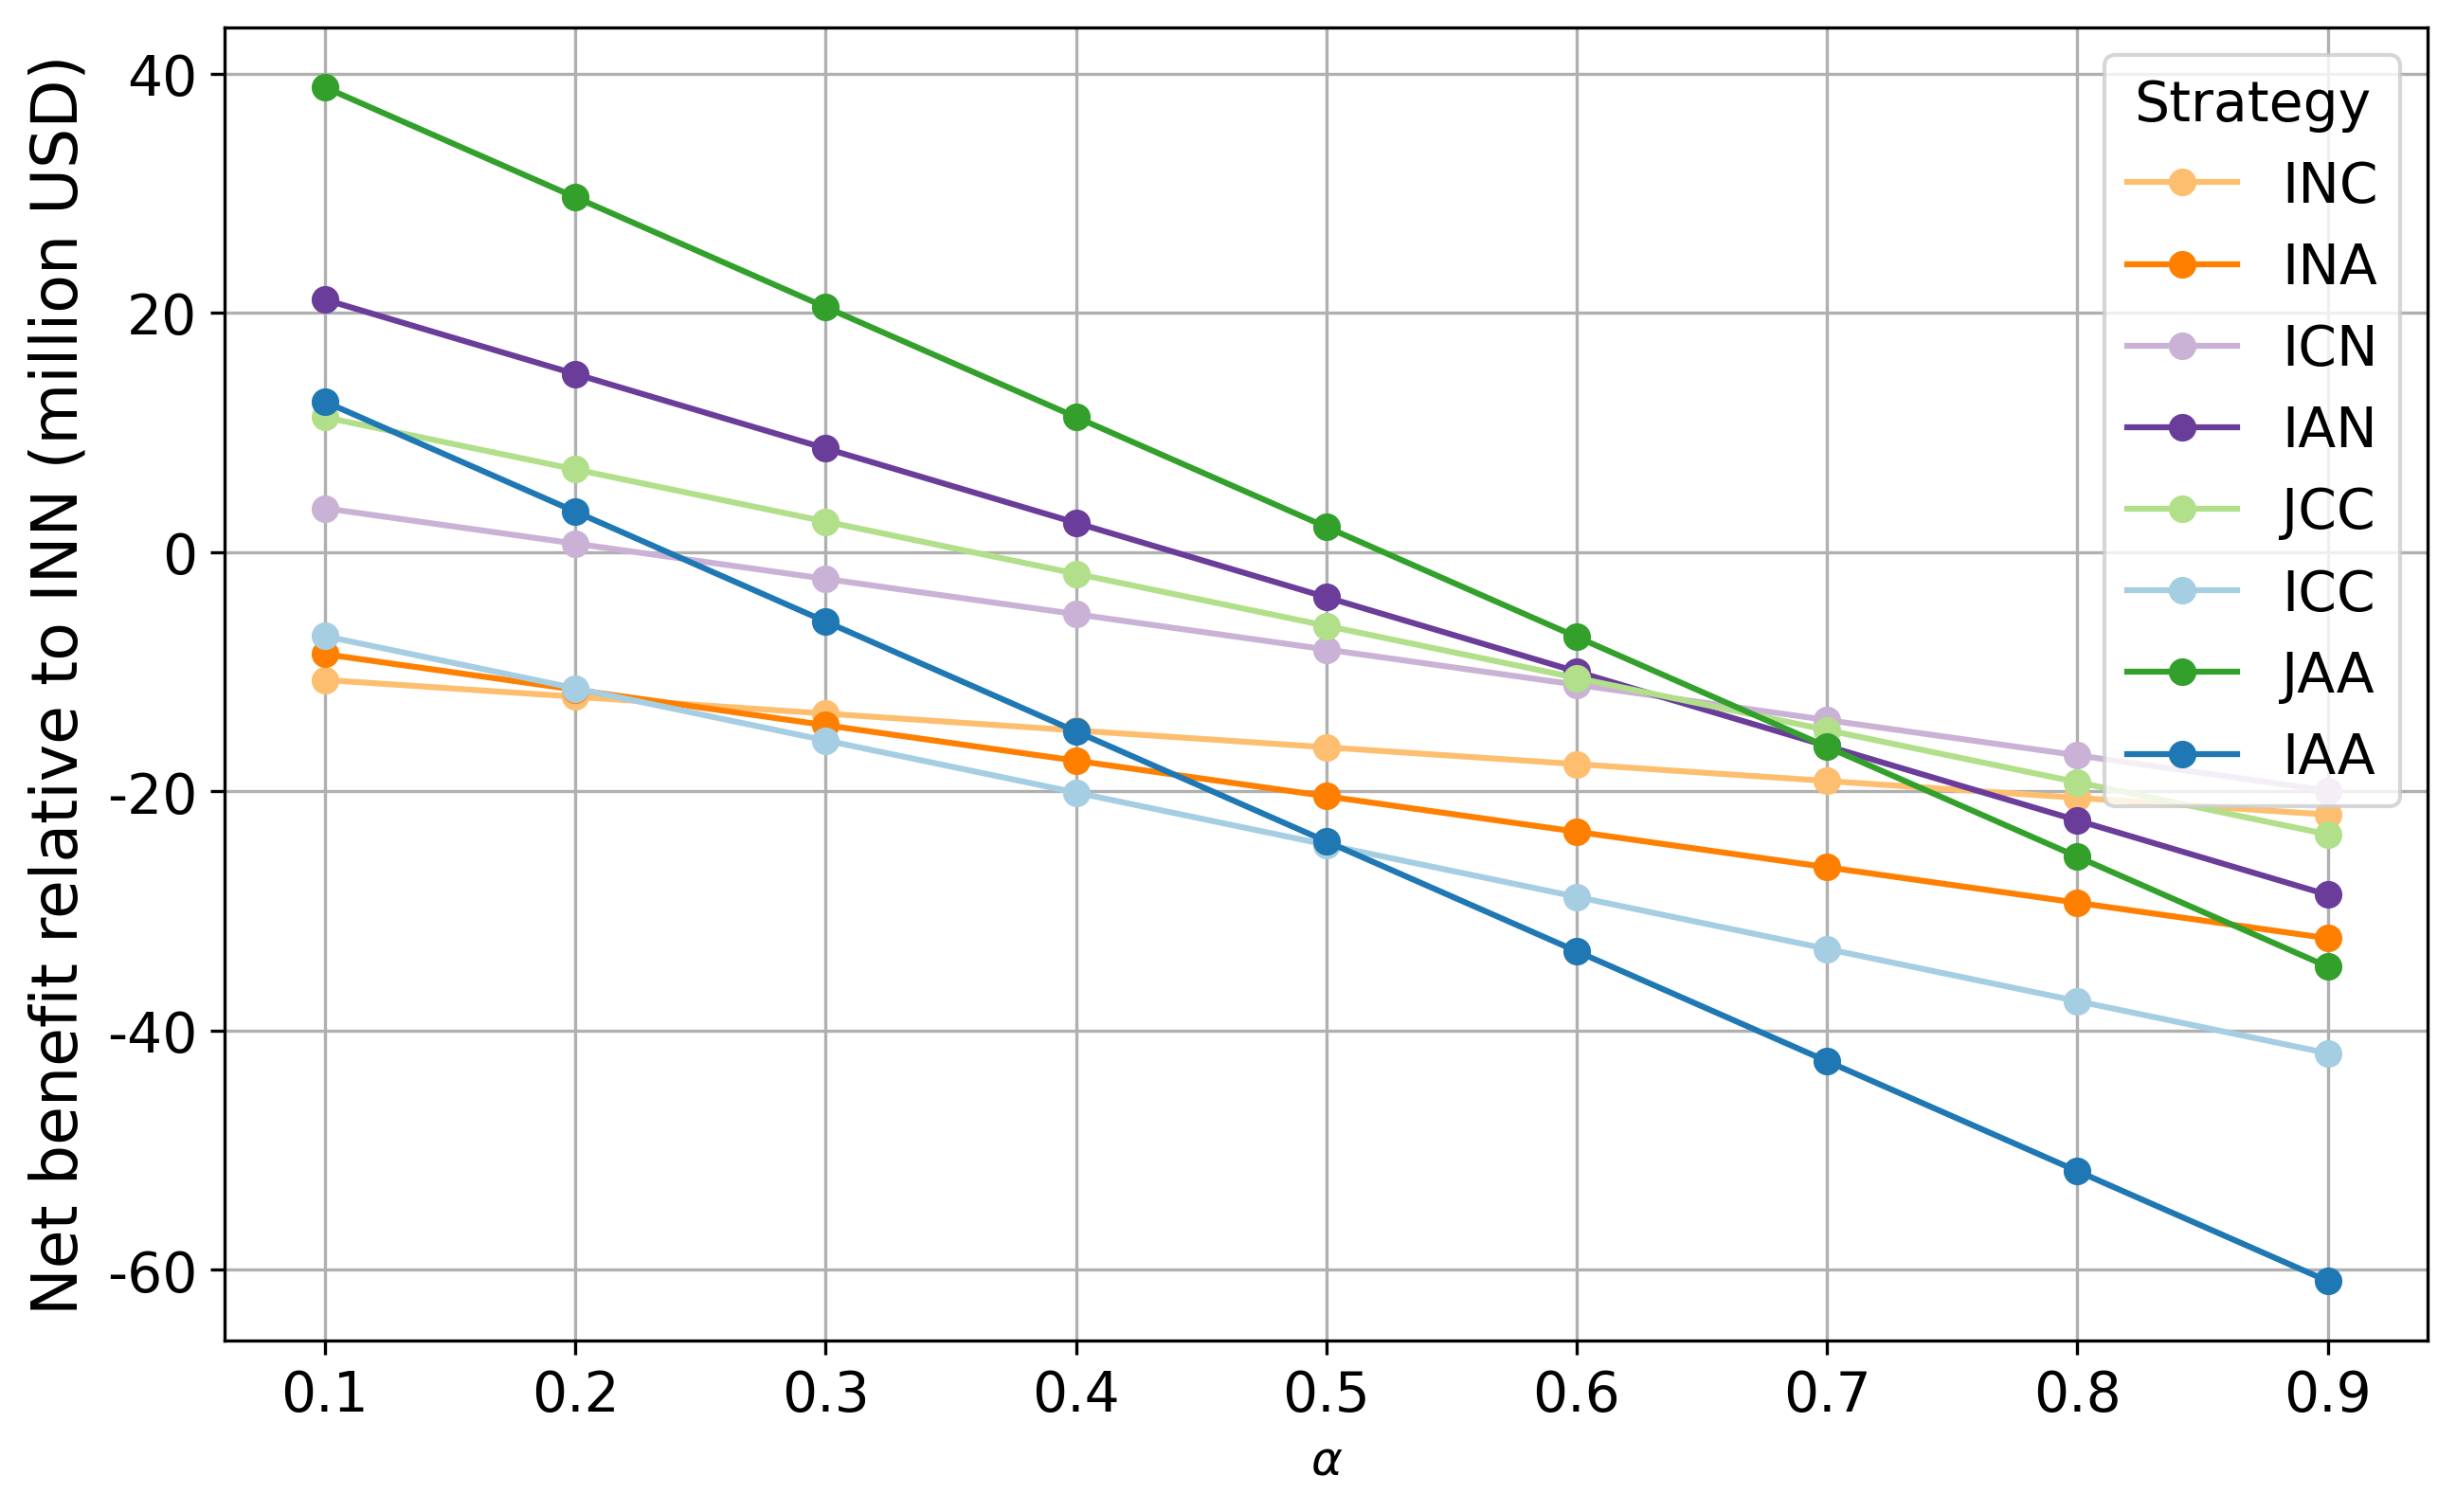

In [36]:
# Base path to the CSV files
base_path = '../../results/outcomes/Sensitivity2/'

# Function to format the y-axis tick labels as millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.0f}'


# List of r values
alpha_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# Dictionary to hold data
data = {}

# Read each CSV and extract the 'net_benefit' column
for alpha in alpha_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_alpha={alpha}.csv"
    df = pd.read_csv(file_path)
    df=df.loc[df['Strategy']!="INN"]
    # Make sure the strategy names are set as the index
    df.set_index('Strategy', inplace=True)
    data[alpha] = df['net_benefit']

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(data)

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
for strategy in combined_df.index:
    plt.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])

# Set y-axis formatter
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter) 
    
plt.xlabel(r'$\alpha$', fontsize=12)
plt.ylabel('Net benefit relative to INN (million USD)', fontsize=16)

# Increase font size for x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Strategy', title_fontsize=14, fontsize=14)
plt.grid(True)

plt.show()


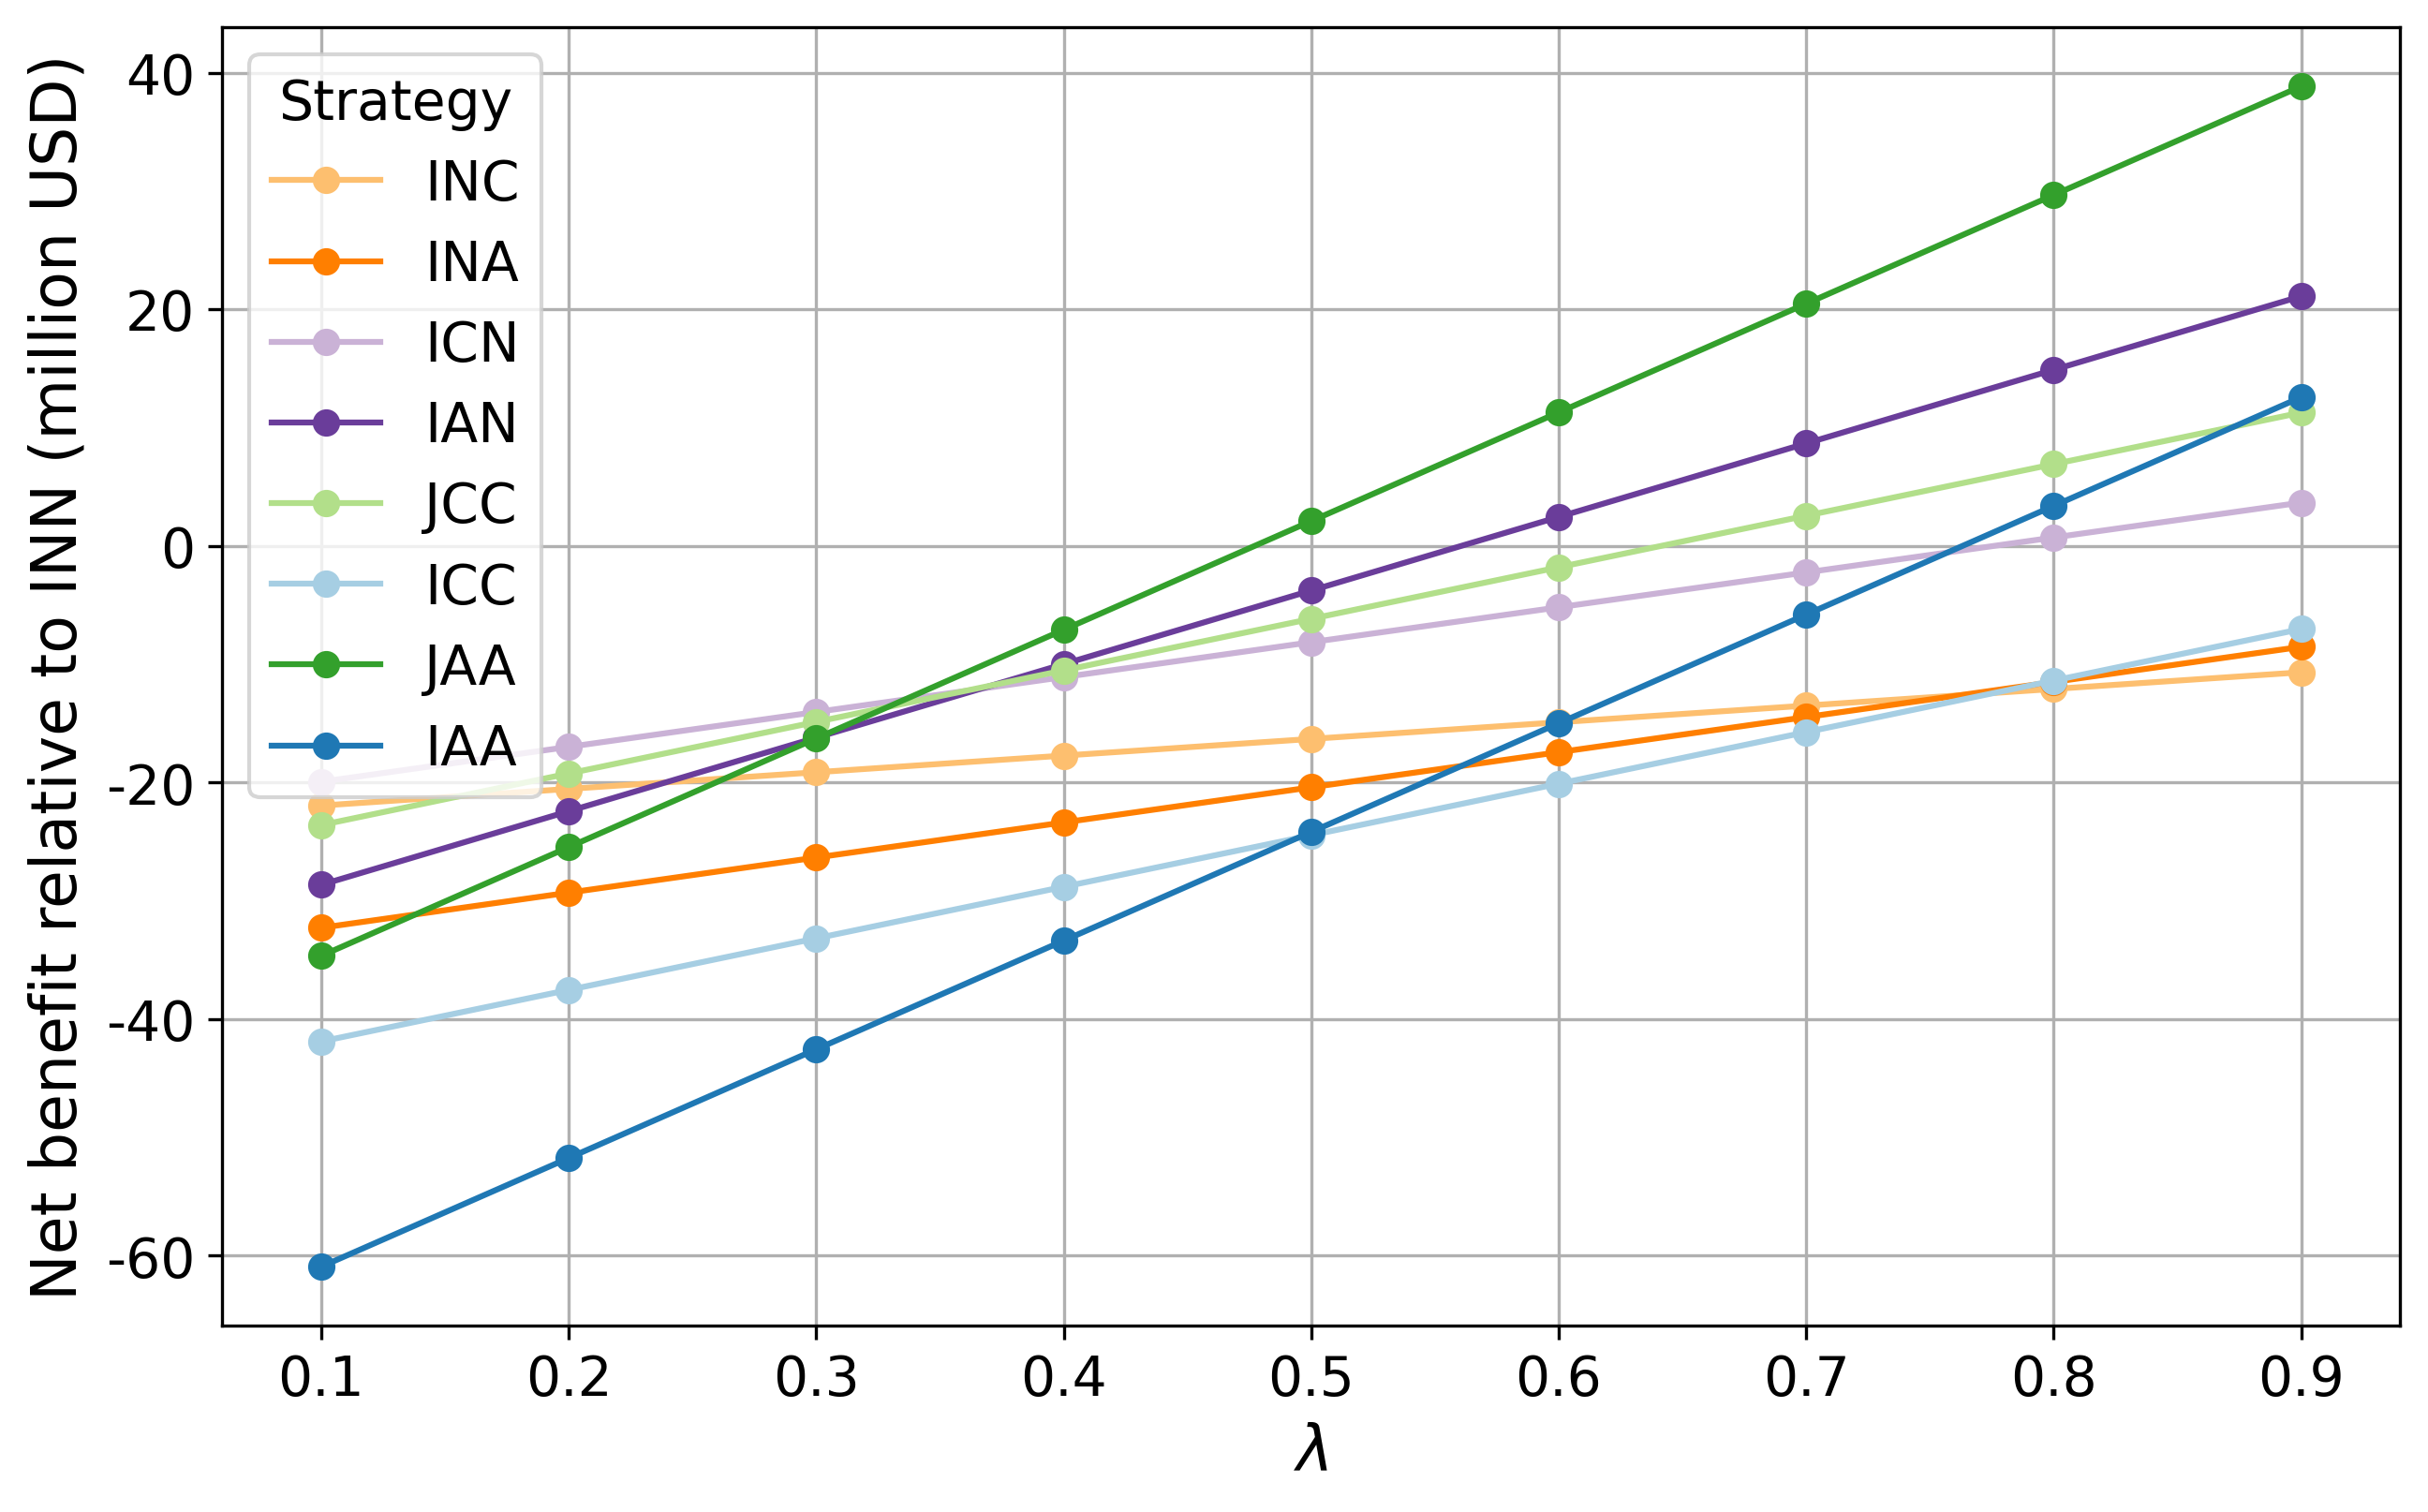

In [27]:
# Base path to the CSV files
base_path = '../../results/outcomes/Sensitivity2/'

# Function to format the y-axis tick labels as millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.0f}'


# List of r values
alpha_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# Dictionary to hold data
data = {}

# Read each CSV and extract the 'net_benefit' column
for alpha in alpha_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_alpha={alpha}.csv"
    df = pd.read_csv(file_path)
    df=df.loc[df['Strategy']!="INN"]
    # Make sure the strategy names are set as the index
    df.set_index('Strategy', inplace=True)
    lamb = 1 - alpha
    data[lamb] = df['net_benefit']

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(data)

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
for strategy in combined_df.index:
    plt.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])

# Set y-axis formatter
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter) 
    
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylabel('Net benefit relative to INN (million USD)', fontsize=16)

# Increase font size for x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Strategy', title_fontsize=14, fontsize=14)
plt.grid(True)

plt.show()


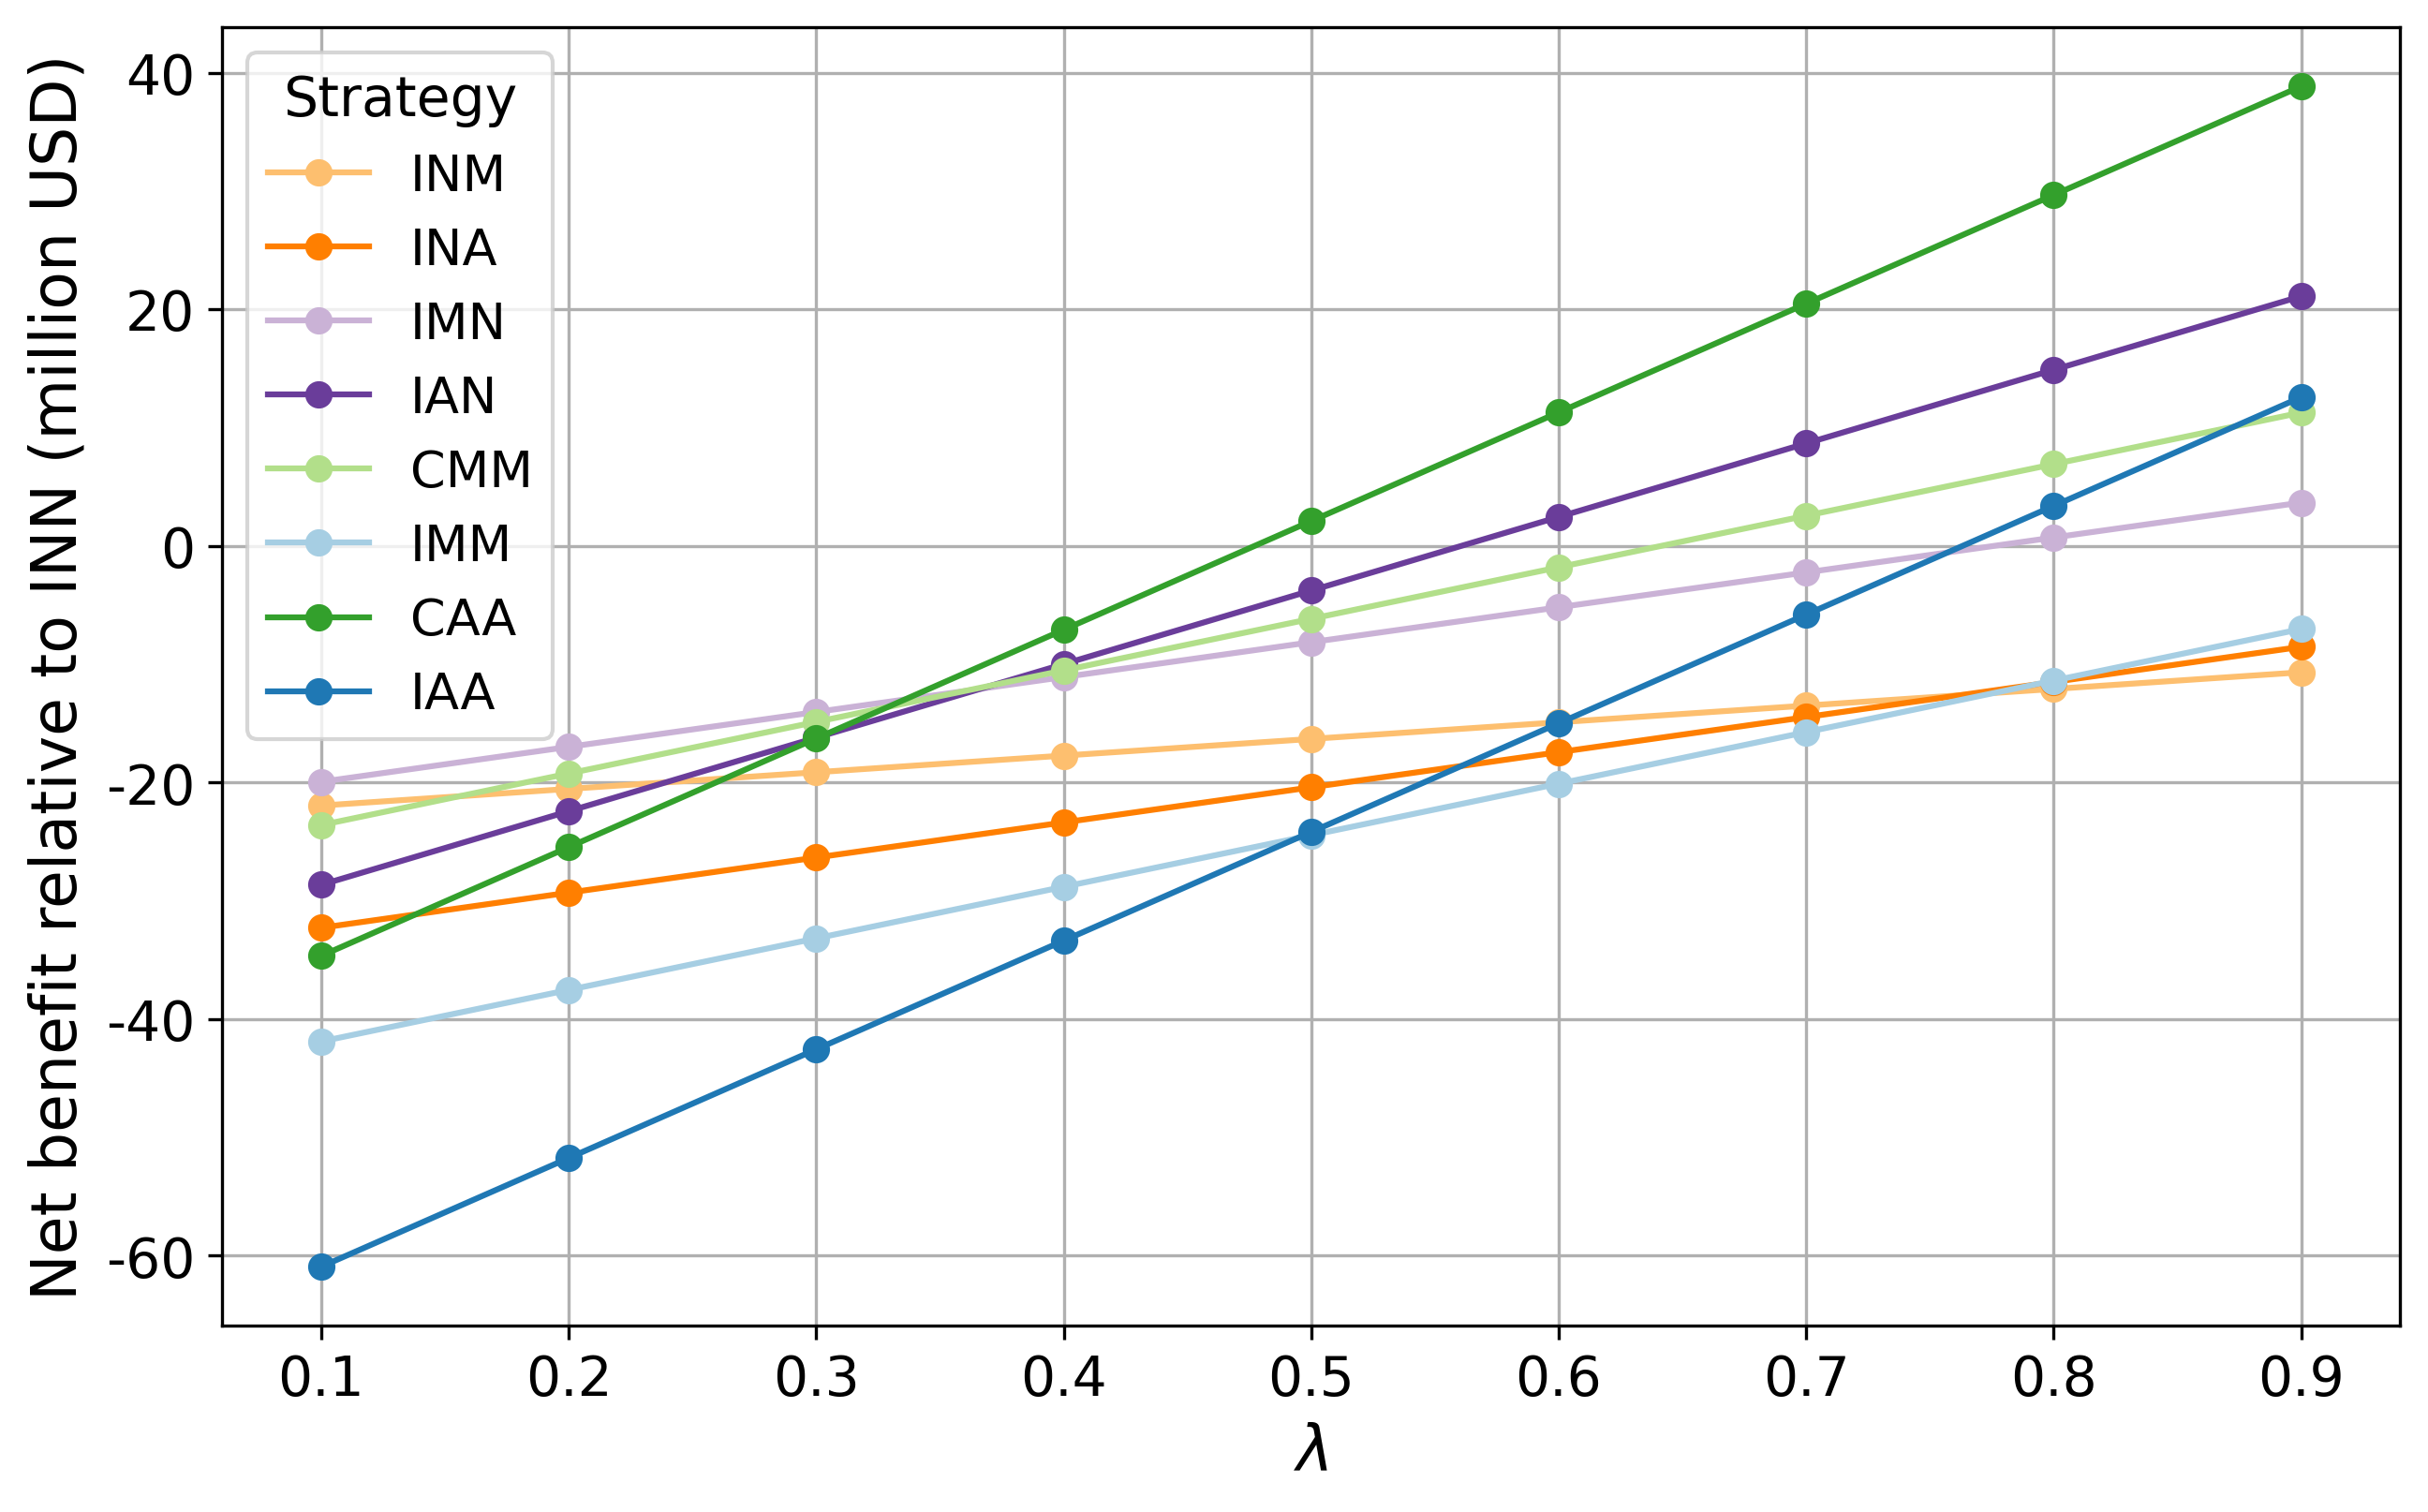

In [30]:
# Base path to the CSV files
base_path = '../../results/outcomes/Sensitivity2/'

# Function to format the y-axis tick labels as millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.0f}'


# List of r values
alpha_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# Dictionary to hold data
data = {}

# Read each CSV and extract the 'net_benefit' column
for alpha in alpha_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_alpha={alpha}.csv"
    df = pd.read_csv(file_path)
    df=df.loc[df['Strategy']!="INN"]
    # Make sure the strategy names are set as the index
    df.set_index('Strategy', inplace=True)
    lamb = 1 - alpha
    data[lamb] = df['net_benefit']

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(data)

# Renaming map
rename_map = {
    'INN': 'INN',
    'INC': 'INM',
    'INA': 'INA',
    'ICN': 'IMN',
    'IAN': 'IAN',
    'JCC': 'CMM',
    'ICC': 'IMM',
    'JAA': 'CAA',
    'IAA': 'IAA'
}

combined_df.index = combined_df.index.to_series().replace(rename_map)


# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
}

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
for strategy in combined_df.index:
    plt.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])

# Set y-axis formatter
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter) 
    
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylabel('Net benefit relative to INN (million USD)', fontsize=16)

# Increase font size for x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Strategy', title_fontsize=14, fontsize=13)
plt.grid(True)

plt.show()


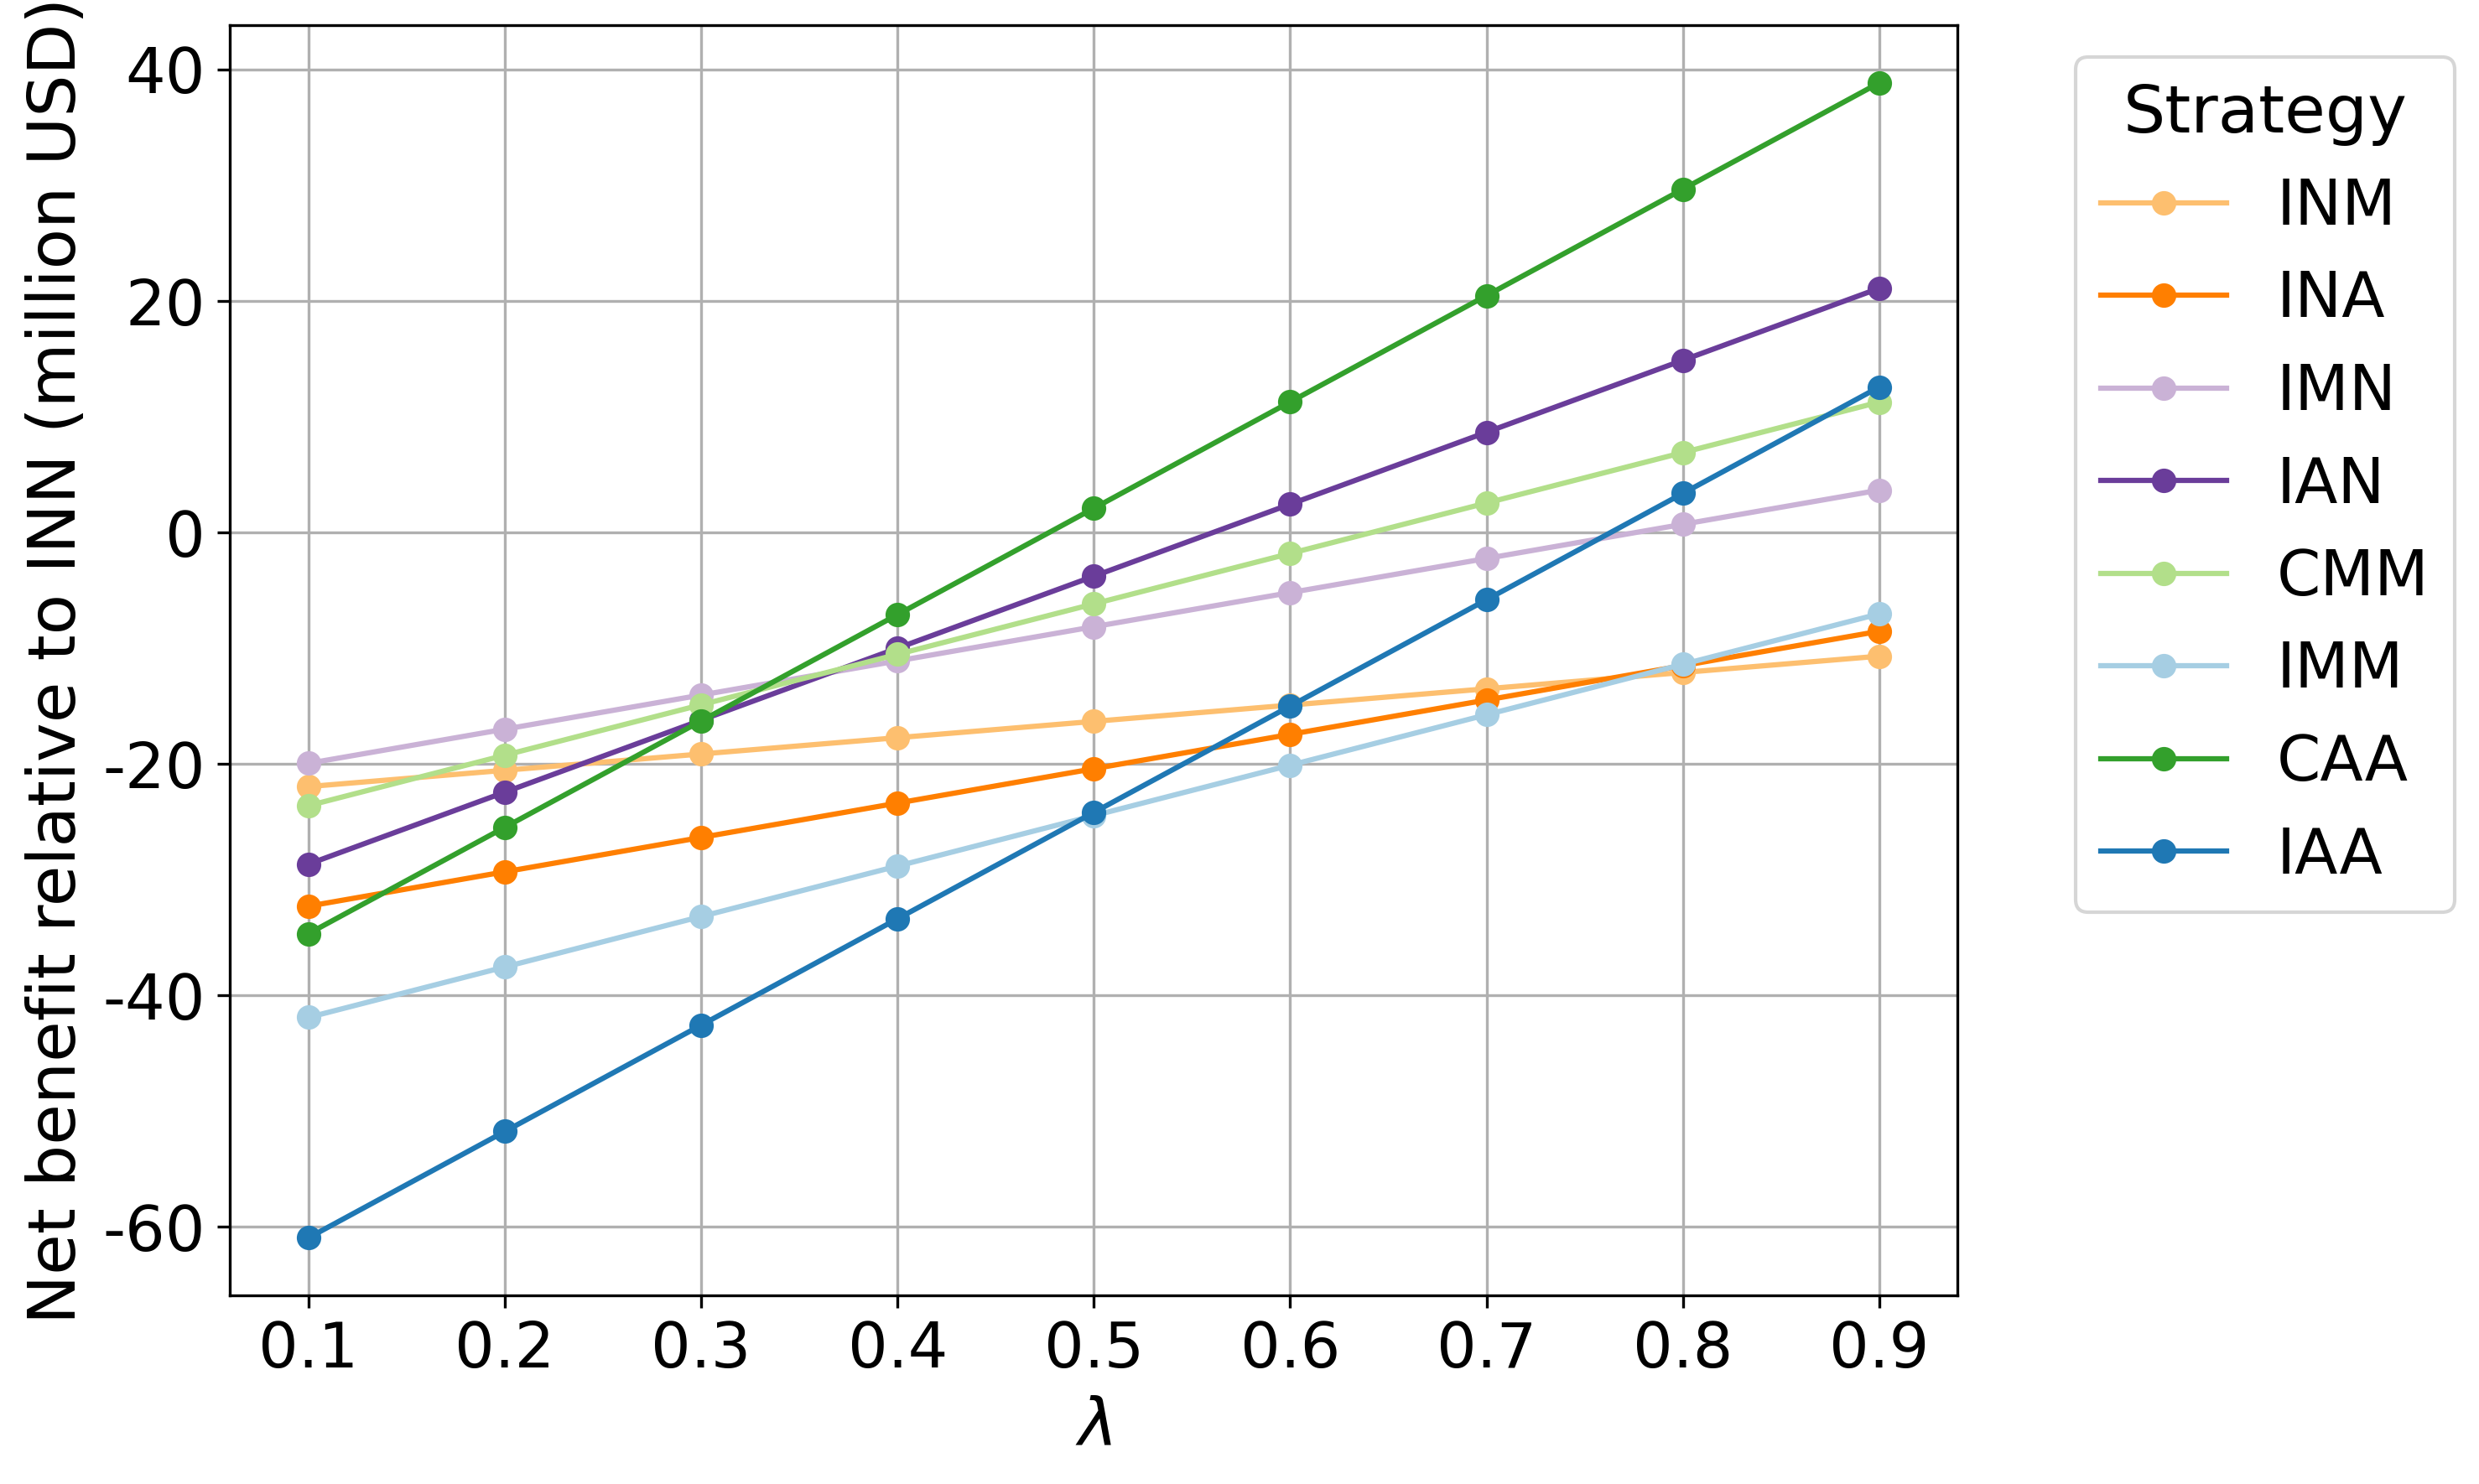

In [34]:
# Base path to the CSV files
base_path = '../../results/outcomes/Sensitivity2/'

# Function to format the y-axis tick labels as millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.0f}'

# List of alpha values
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Dictionary to hold data
data = {}

# Read each CSV and extract the 'net_benefit' column
for alpha in alpha_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_alpha={alpha}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    # Make sure the strategy names are set as the index
    df.set_index('Strategy', inplace=True)
    lamb = 1 - alpha
    data[lamb] = df['net_benefit']

# Create a DataFrame from the dictionary
combined_df = pd.DataFrame(data)

# Renaming map
rename_map = {
    'INN': 'INN',
    'INC': 'INM',
    'INA': 'INA',
    'ICN': 'IMN',
    'IAN': 'IAN',
    'JCC': 'CMM',
    'ICC': 'IMM',
    'JAA': 'CAA',
    'IAA': 'IAA'
}

combined_df.index = combined_df.index.to_series().replace(rename_map)

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
}

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
for strategy in combined_df.index:
    plt.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])

# Set y-axis formatter
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel(r'$\lambda$', fontsize=19)
plt.ylabel('Net benefit relative to INN (million USD)', fontsize=19)

# Increase font size for x and y ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adjust legend position
plt.legend(title='Strategy', title_fontsize=19, fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


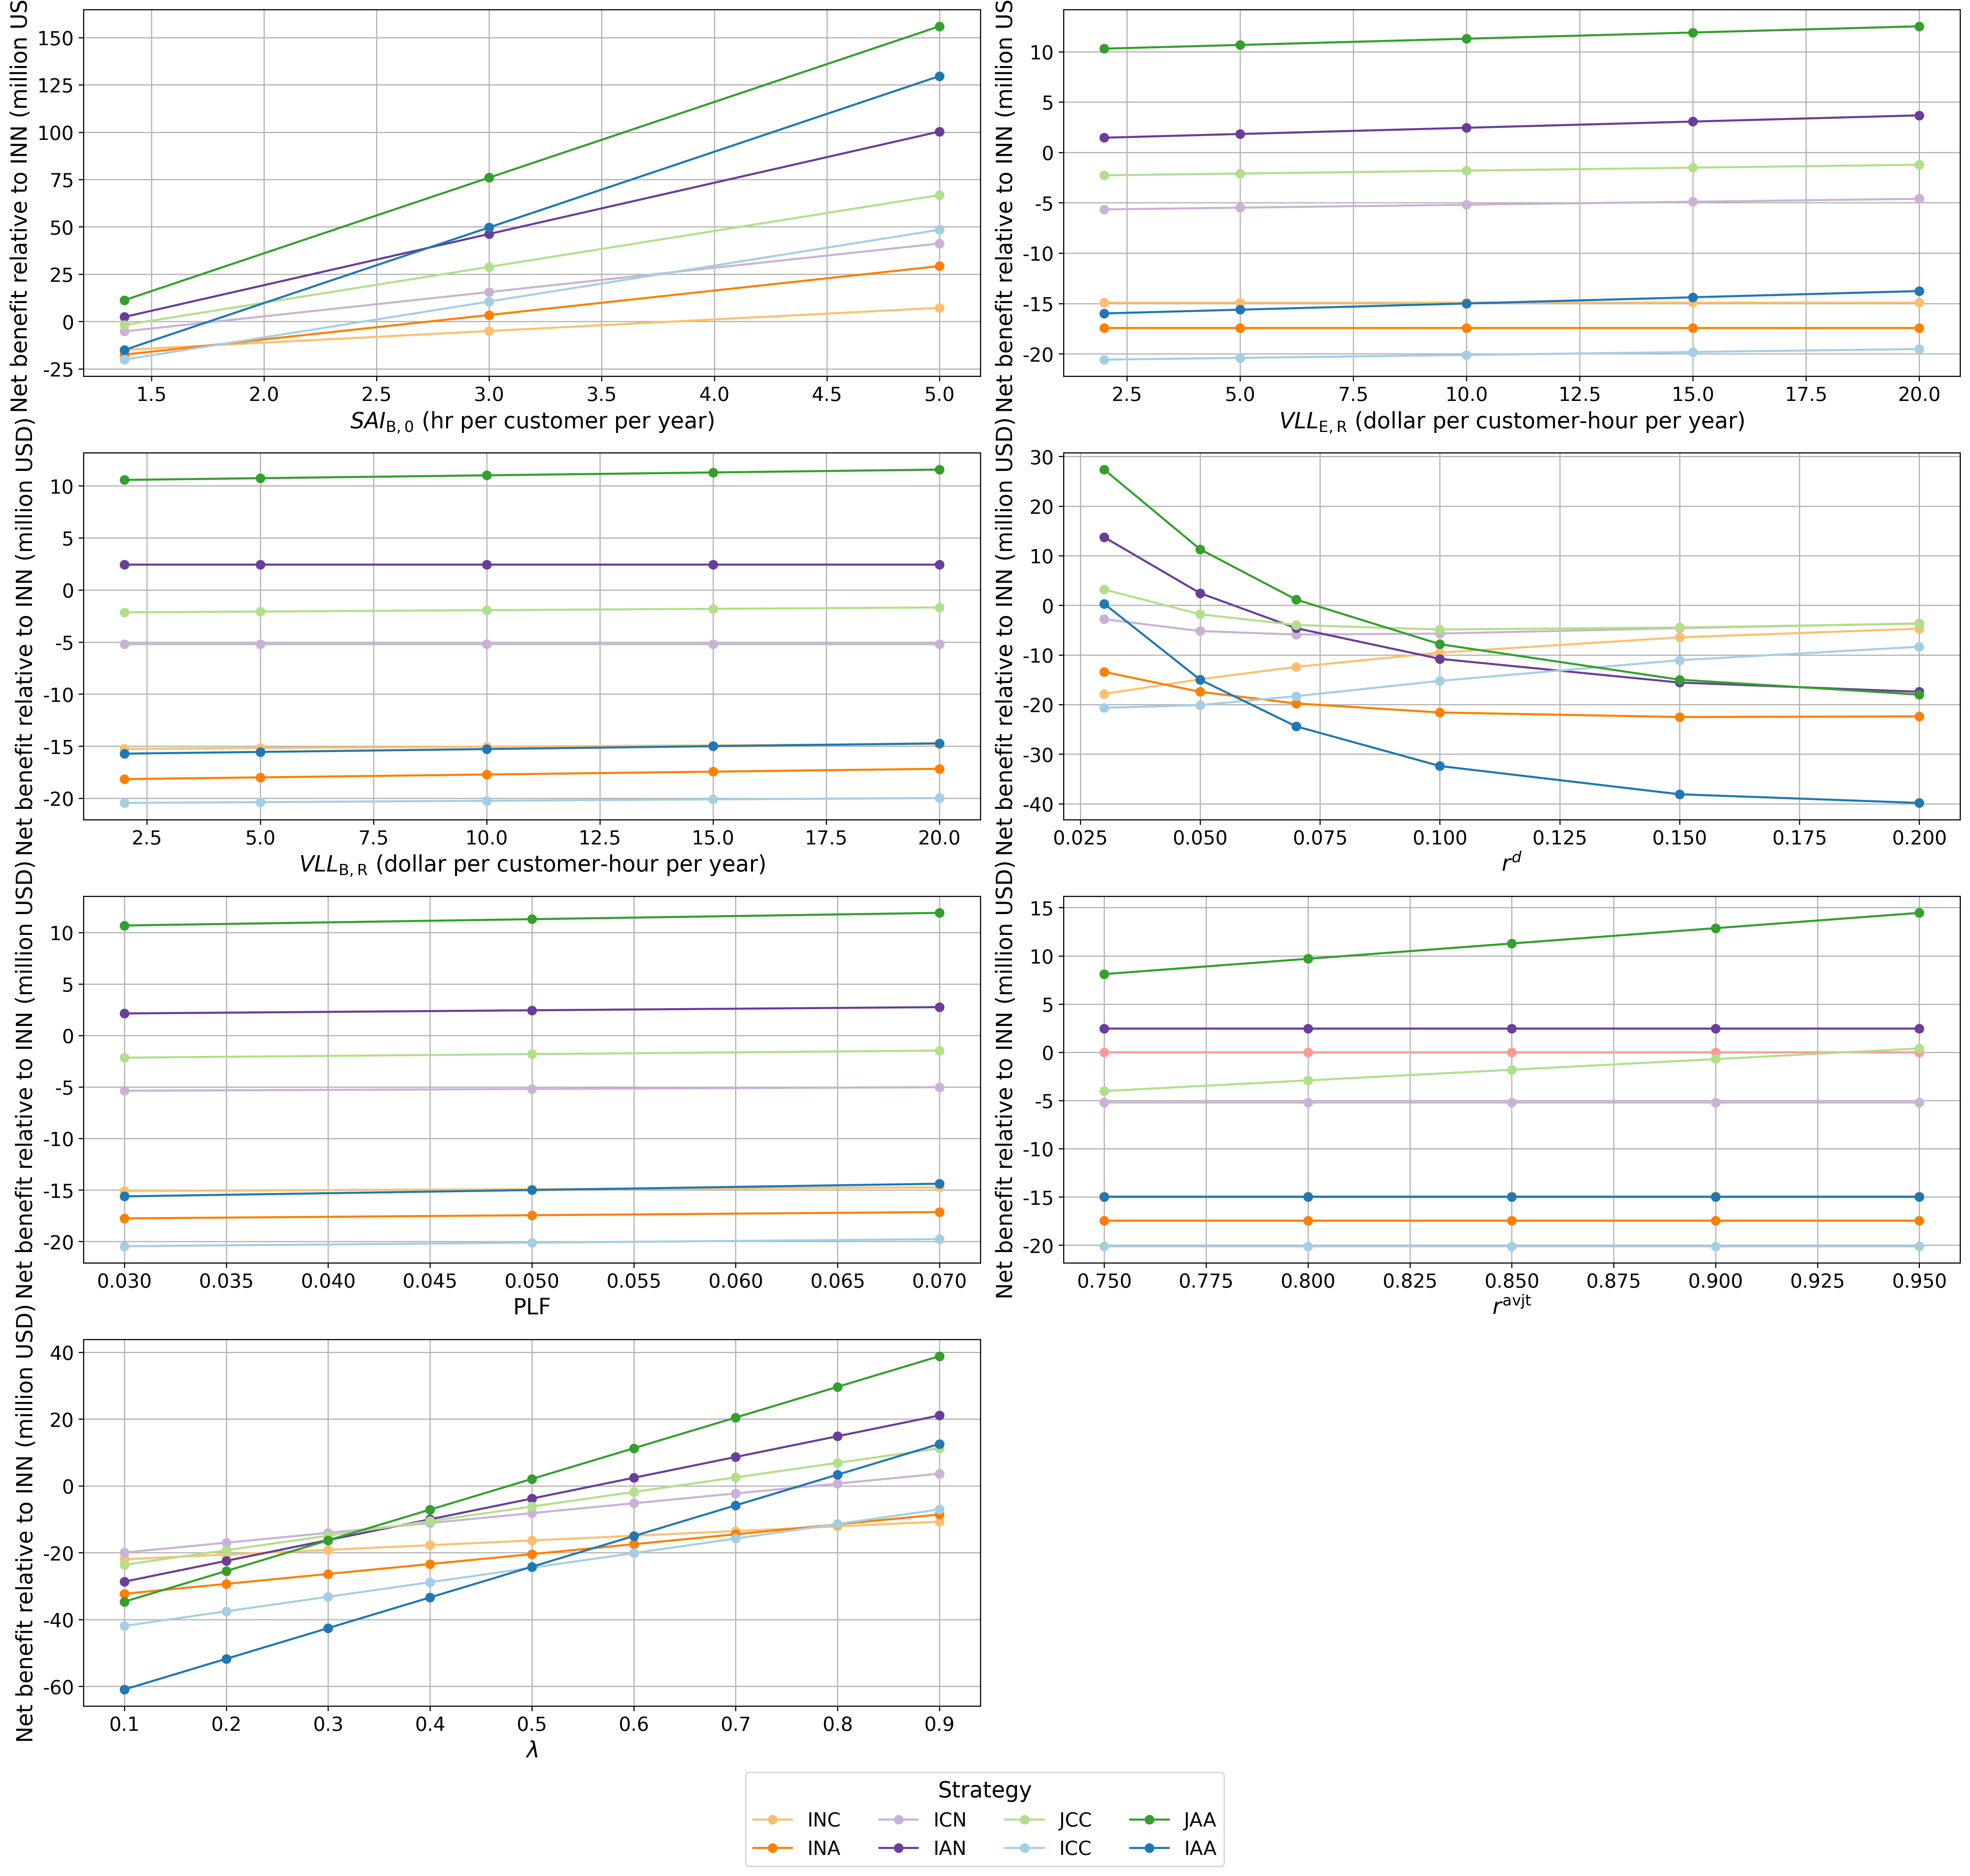

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Base path to the CSV files
base_path = '../../results/outcomes/Sensitivity2/'

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Function to format the y-axis tick labels as millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.0f}'

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20), dpi=300, sharex=False, sharey=False)
axes = axes.flatten()

# Figure 1
sai_values = [1.38, 3, 5]
data = {}
for sai in sai_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_SAI_{{B,0}}={sai}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[sai] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[0]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$SAI_{\mathrm{B,0}}$ (hr per customer per year)', fontsize=16)
ax.set_ylabel('Net benefit relative to INN (million USD)', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Figure 2
vll_values = [2, 5, 10, 15, 20]
data = {}
for vll in vll_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_vll_el_R_{vll}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[vll] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[1]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$VLL_{\mathrm{E,R}}$ (dollar per customer-hour per year)', fontsize=16)
ax.set_ylabel('Net benefit relative to INN (million USD)', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Figure 3
vll_values = [2, 5, 10, 15, 20]

data = {}
for vll in vll_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_vll_br_R_{vll}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[vll] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[2]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$VLL_{\mathrm{B,R}}$ (dollar per customer-hour per year)', fontsize=16)
ax.set_ylabel('Net benefit relative to INN (million USD)', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Figure 4
r_values = [0.03, 0.05, 0.07, 0.1, 0.15, 0.2]
data = {}
for r in r_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_r={r}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[r] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[3]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$r^d$', fontsize=16)
ax.set_ylabel('Net benefit relative to INN (million USD)', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Figure 5
plf_values = [0.03, 0.05, 0.07]
data = {}
for plf in plf_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_plf={plf}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[plf] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[4]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel('PLF', fontsize=16)
ax.set_ylabel('Net benefit relative to INN (million USD)', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Figure 6
saving_values = [0.05, 0.1, 0.15, 0.2, 0.25]
data = {}
for saving in saving_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_cost_saving={saving}.csv"
    df = pd.read_csv(file_path)
    df.set_index('Strategy', inplace=True)
    data[1-saving] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[5]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$r^{\mathrm{avjt}}$', fontsize=16)
ax.set_ylabel('Net benefit relative to INN (million USD)', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Figure 7
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
data = {}
for alpha in alpha_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_alpha={alpha}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    lamb = 1 - alpha
    data[lamb] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[6]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$\lambda$', fontsize=16)
ax.set_ylabel('Net benefit relative to INN (million USD)', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Hide the last subplot (unused)
axes[-1].axis('off')

# Create a single legend for the entire figure at the bottom
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, title='Strategy', title_fontsize=16, fontsize=14)

# Adjust layout to leave space for the legend
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

plt.show()



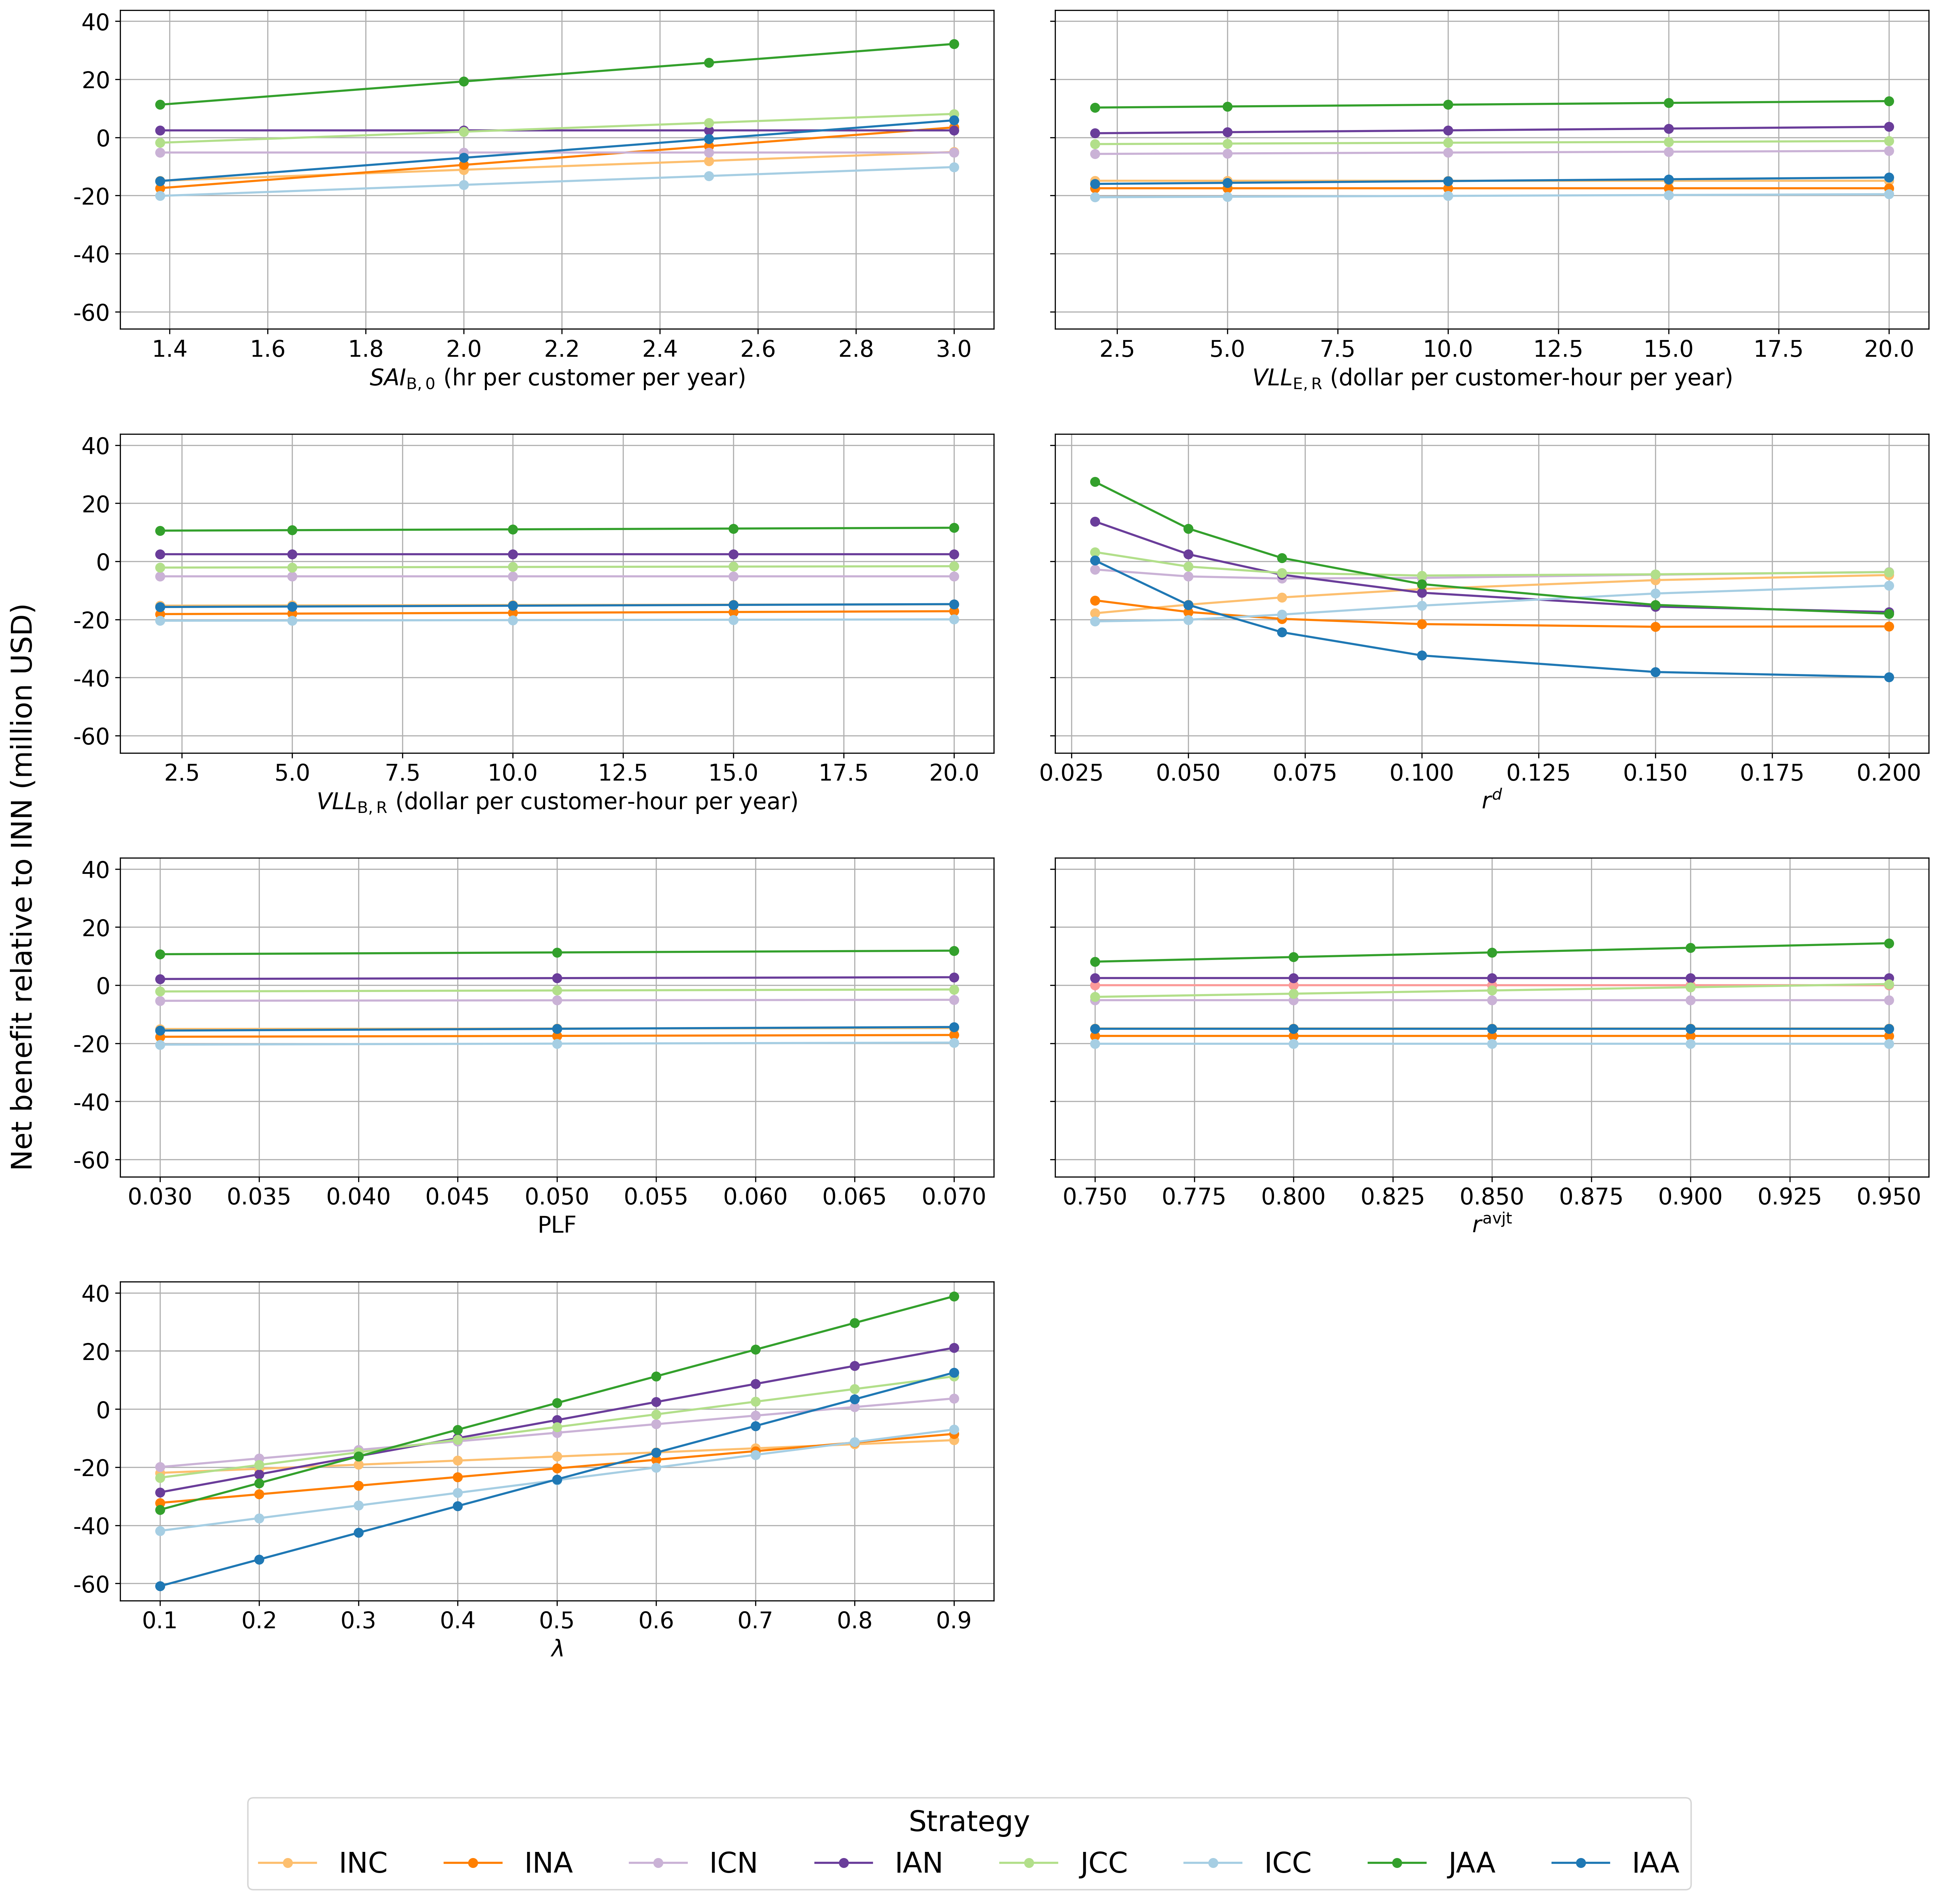

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Base path to the CSV files
base_path = '../../results/outcomes/Sensitivity2/'

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Function to format the y-axis tick labels as millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.0f}'

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20), dpi=300, sharex=False, sharey=True)
axes = axes.flatten()

# Figure 1
sai_values = [1.38, 2, 2.5, 3]
data = {}
for sai in sai_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_SAI_{{B,0}}={sai}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[sai] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[0]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$SAI_{\mathrm{B,0}}$ (hr per customer per year)', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Figure 2
vll_values = [2, 5, 10, 15, 20]
data = {}
for vll in vll_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_vll_el_R_{vll}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[vll] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[1]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$VLL_{\mathrm{E,R}}$ (dollar per customer-hour per year)', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Figure 3
vll_values = [2, 5, 10, 15, 20]
data = {}
for vll in vll_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_vll_br_R_{vll}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[vll] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[2]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$VLL_{\mathrm{B,R}}$ (dollar per customer-hour per year)', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Figure 4
r_values = [0.03, 0.05, 0.07, 0.1, 0.15, 0.2]
data = {}
for r in r_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_r={r}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[r] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[3]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$r^d$', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Figure 5
plf_values = [0.03, 0.05, 0.07]
data = {}
for plf in plf_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_plf={plf}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[plf] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[4]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel('PLF', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Figure 6
saving_values = [0.05, 0.1, 0.15, 0.2, 0.25]
data = {}
for saving in saving_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_cost_saving={saving}.csv"
    df = pd.read_csv(file_path)
    df.set_index('Strategy', inplace=True)
    data[1-saving] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[5]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$r^{\mathrm{avjt}}$', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Figure 7
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
data = {}
for alpha in alpha_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_alpha={alpha}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    lamb = 1 - alpha
    data[lamb] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[6]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$\lambda$', fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Hide the last subplot (unused)
axes[-1].axis('off')

# Set a single y-axis label for the entire figure
fig.text(0.04, 0.5, 'Net benefit relative to INN (million USD)', va='center', rotation='vertical', fontsize=20)

# Create a single legend for the entire figure at the bottom
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=8, title='Strategy', title_fontsize=20, fontsize=20)

# Adjust layout to leave space for the legend
#plt.tight_layout(rect=[0.05, 0.1, 1, 0.95])

# Adjust layout to leave space for the legend and increase spacing between subplots
plt.tight_layout(rect=[0.05, 0.1, 1, 0.95], pad=3.0)

plt.show()


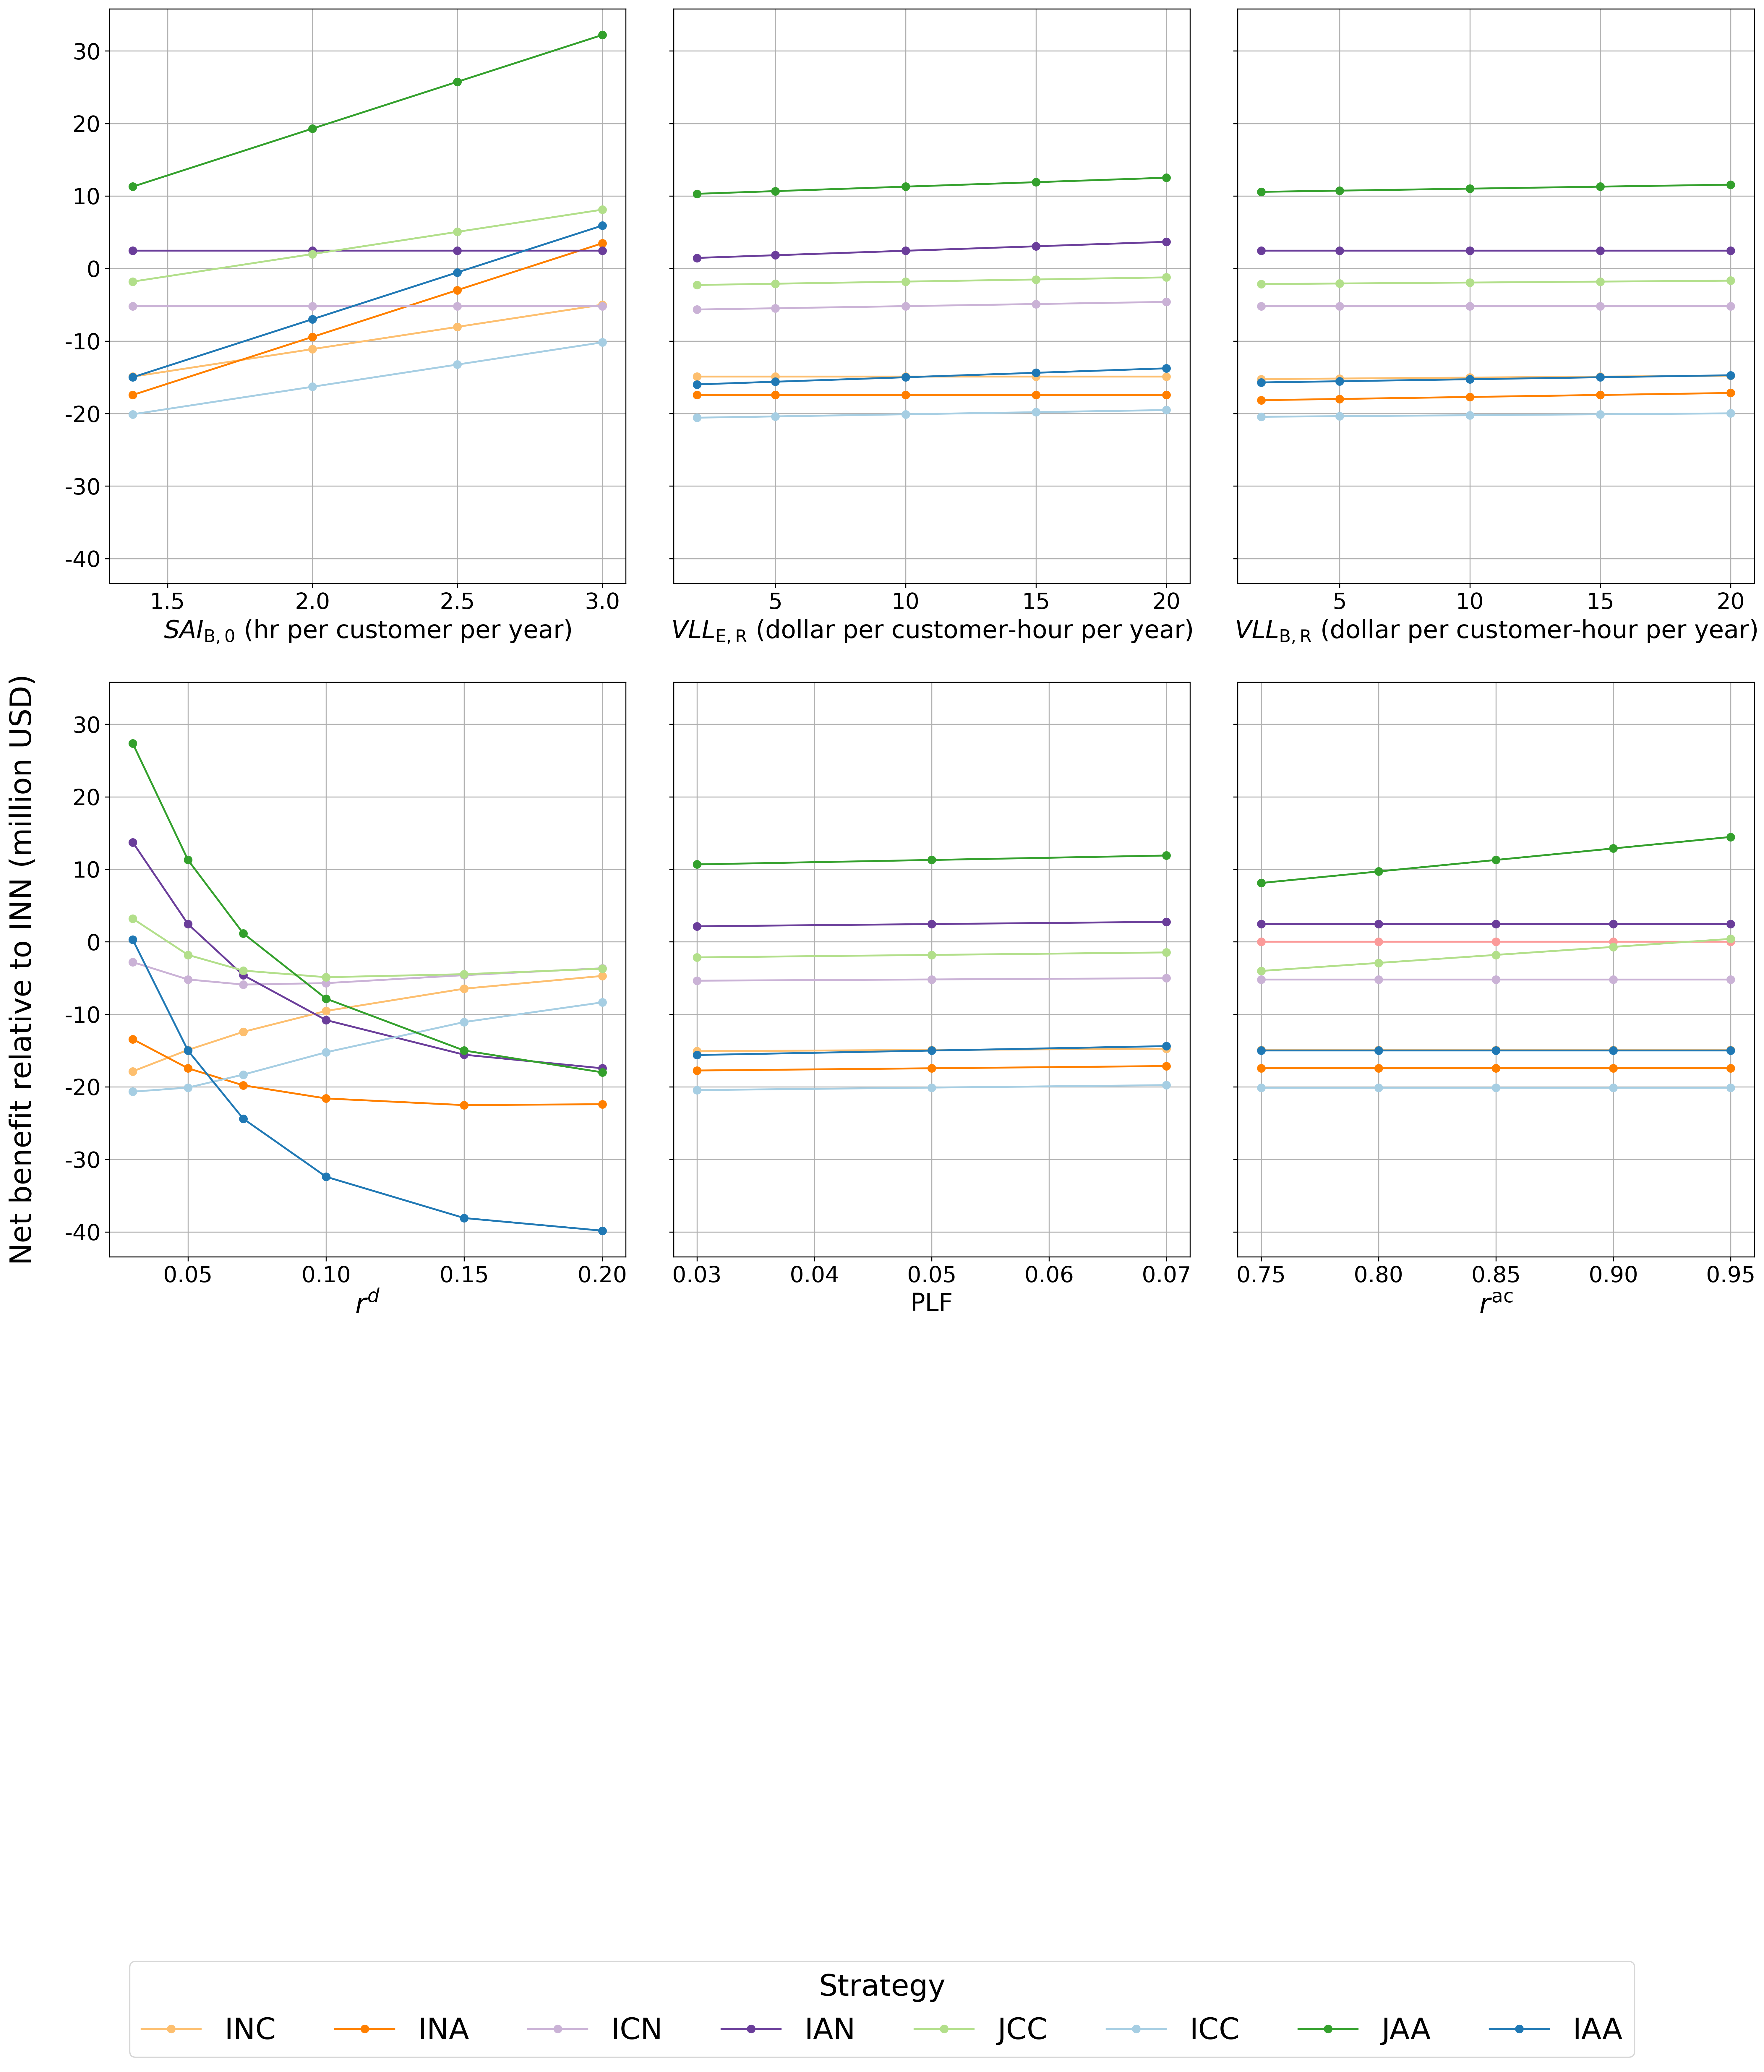

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Base path to the CSV files
base_path = '../../results/outcomes/Sensitivity2/'

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Function to format the y-axis tick labels as millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.0f}'

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(21, 25), dpi=300, sharex=False, sharey=True)
axes = axes.flatten()

# Figure 1
sai_values = [1.38, 2, 2.5, 3]
data = {}
for sai in sai_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_SAI_{{B,0}}={sai}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[sai] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[0]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$SAI_{\mathrm{B,0}}$ (hr per customer per year)', fontsize=20)
ax.grid(True)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Figure 2
vll_values = [2, 5, 10, 15, 20]
data = {}
for vll in vll_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_vll_el_R_{vll}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[vll] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[1]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$VLL_{\mathrm{E,R}}$ (dollar per customer-hour per year)', fontsize=20)
ax.grid(True)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Figure 3
vll_values = [2, 5, 10, 15, 20]
data = {}
for vll in vll_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_vll_br_R_{vll}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[vll] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[2]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$VLL_{\mathrm{B,R}}$ (dollar per customer-hour per year)', fontsize=20)
ax.grid(True)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Figure 4
r_values = [0.03, 0.05, 0.07, 0.1, 0.15, 0.2]
data = {}
for r in r_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_r={r}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[r] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[3]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$r^d$', fontsize=22)
ax.grid(True)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Figure 5
plf_values = [0.03, 0.05, 0.07]
data = {}
for plf in plf_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_plf={plf}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[plf] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[4]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel('PLF', fontsize=20)
ax.grid(True)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Figure 6
saving_values = [0.05, 0.1, 0.15, 0.2, 0.25]
data = {}
for saving in saving_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_cost_saving={saving}.csv"
    df = pd.read_csv(file_path)
    df.set_index('Strategy', inplace=True)
    data[1-saving] = df['net_benefit']
combined_df = pd.DataFrame(data)
ax = axes[5]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$r^{\mathrm{ac}}$', fontsize=22)
ax.grid(True)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Figure 7
#alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#data = {}
#for alpha in alpha_values:
#    file_path = f"{base_path}npv_cost_loss_benefit_relative_alpha={alpha}.csv"
#    df = pd.read_csv(file_path)
#    df = df.loc[df['Strategy'] != "INN"]
#    df.set_index('Strategy', inplace=True)
#    lamb = 1 - alpha
#    data[lamb] = df['net_benefit']
#combined_df = pd.DataFrame(data)
#ax = axes[6]
#for strategy in combined_df.index:
#    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
#ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
#ax.set_xlabel(r'$\lambda$', fontsize=22)
#ax.grid(True)
#ax.tick_params(axis='x', labelsize=18)
#ax.tick_params(axis='y', labelsize=18)

# Hide the last subplot (unused)
axes[-3].axis('off')
axes[-2].axis('off')
axes[-1].axis('off')

# Set a single y-axis label for the entire figure
fig.text(0.04, 0.5, 'Net benefit relative to INN (million USD)', va='center', rotation='vertical', fontsize=24)

# Create a single legend for the entire figure at the bottom
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=8, title='Strategy', title_fontsize=24, fontsize=24)

# Adjust layout to leave space for the legend
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95], pad=3.0)

plt.show()


In [18]:
# Renaming map
rename_map = {
    'INN': 'INN',
    'INC': 'INM',
    'INA': 'INA',
    'ICN': 'IMN',
    'IAN': 'IAN',
    'JCC': 'CMM',
    'ICC': 'IMM',
    'JAA': 'CAA',
    'IAA': 'IAA'
}

combined_df.index = combined_df.index.to_series().replace(rename_map)

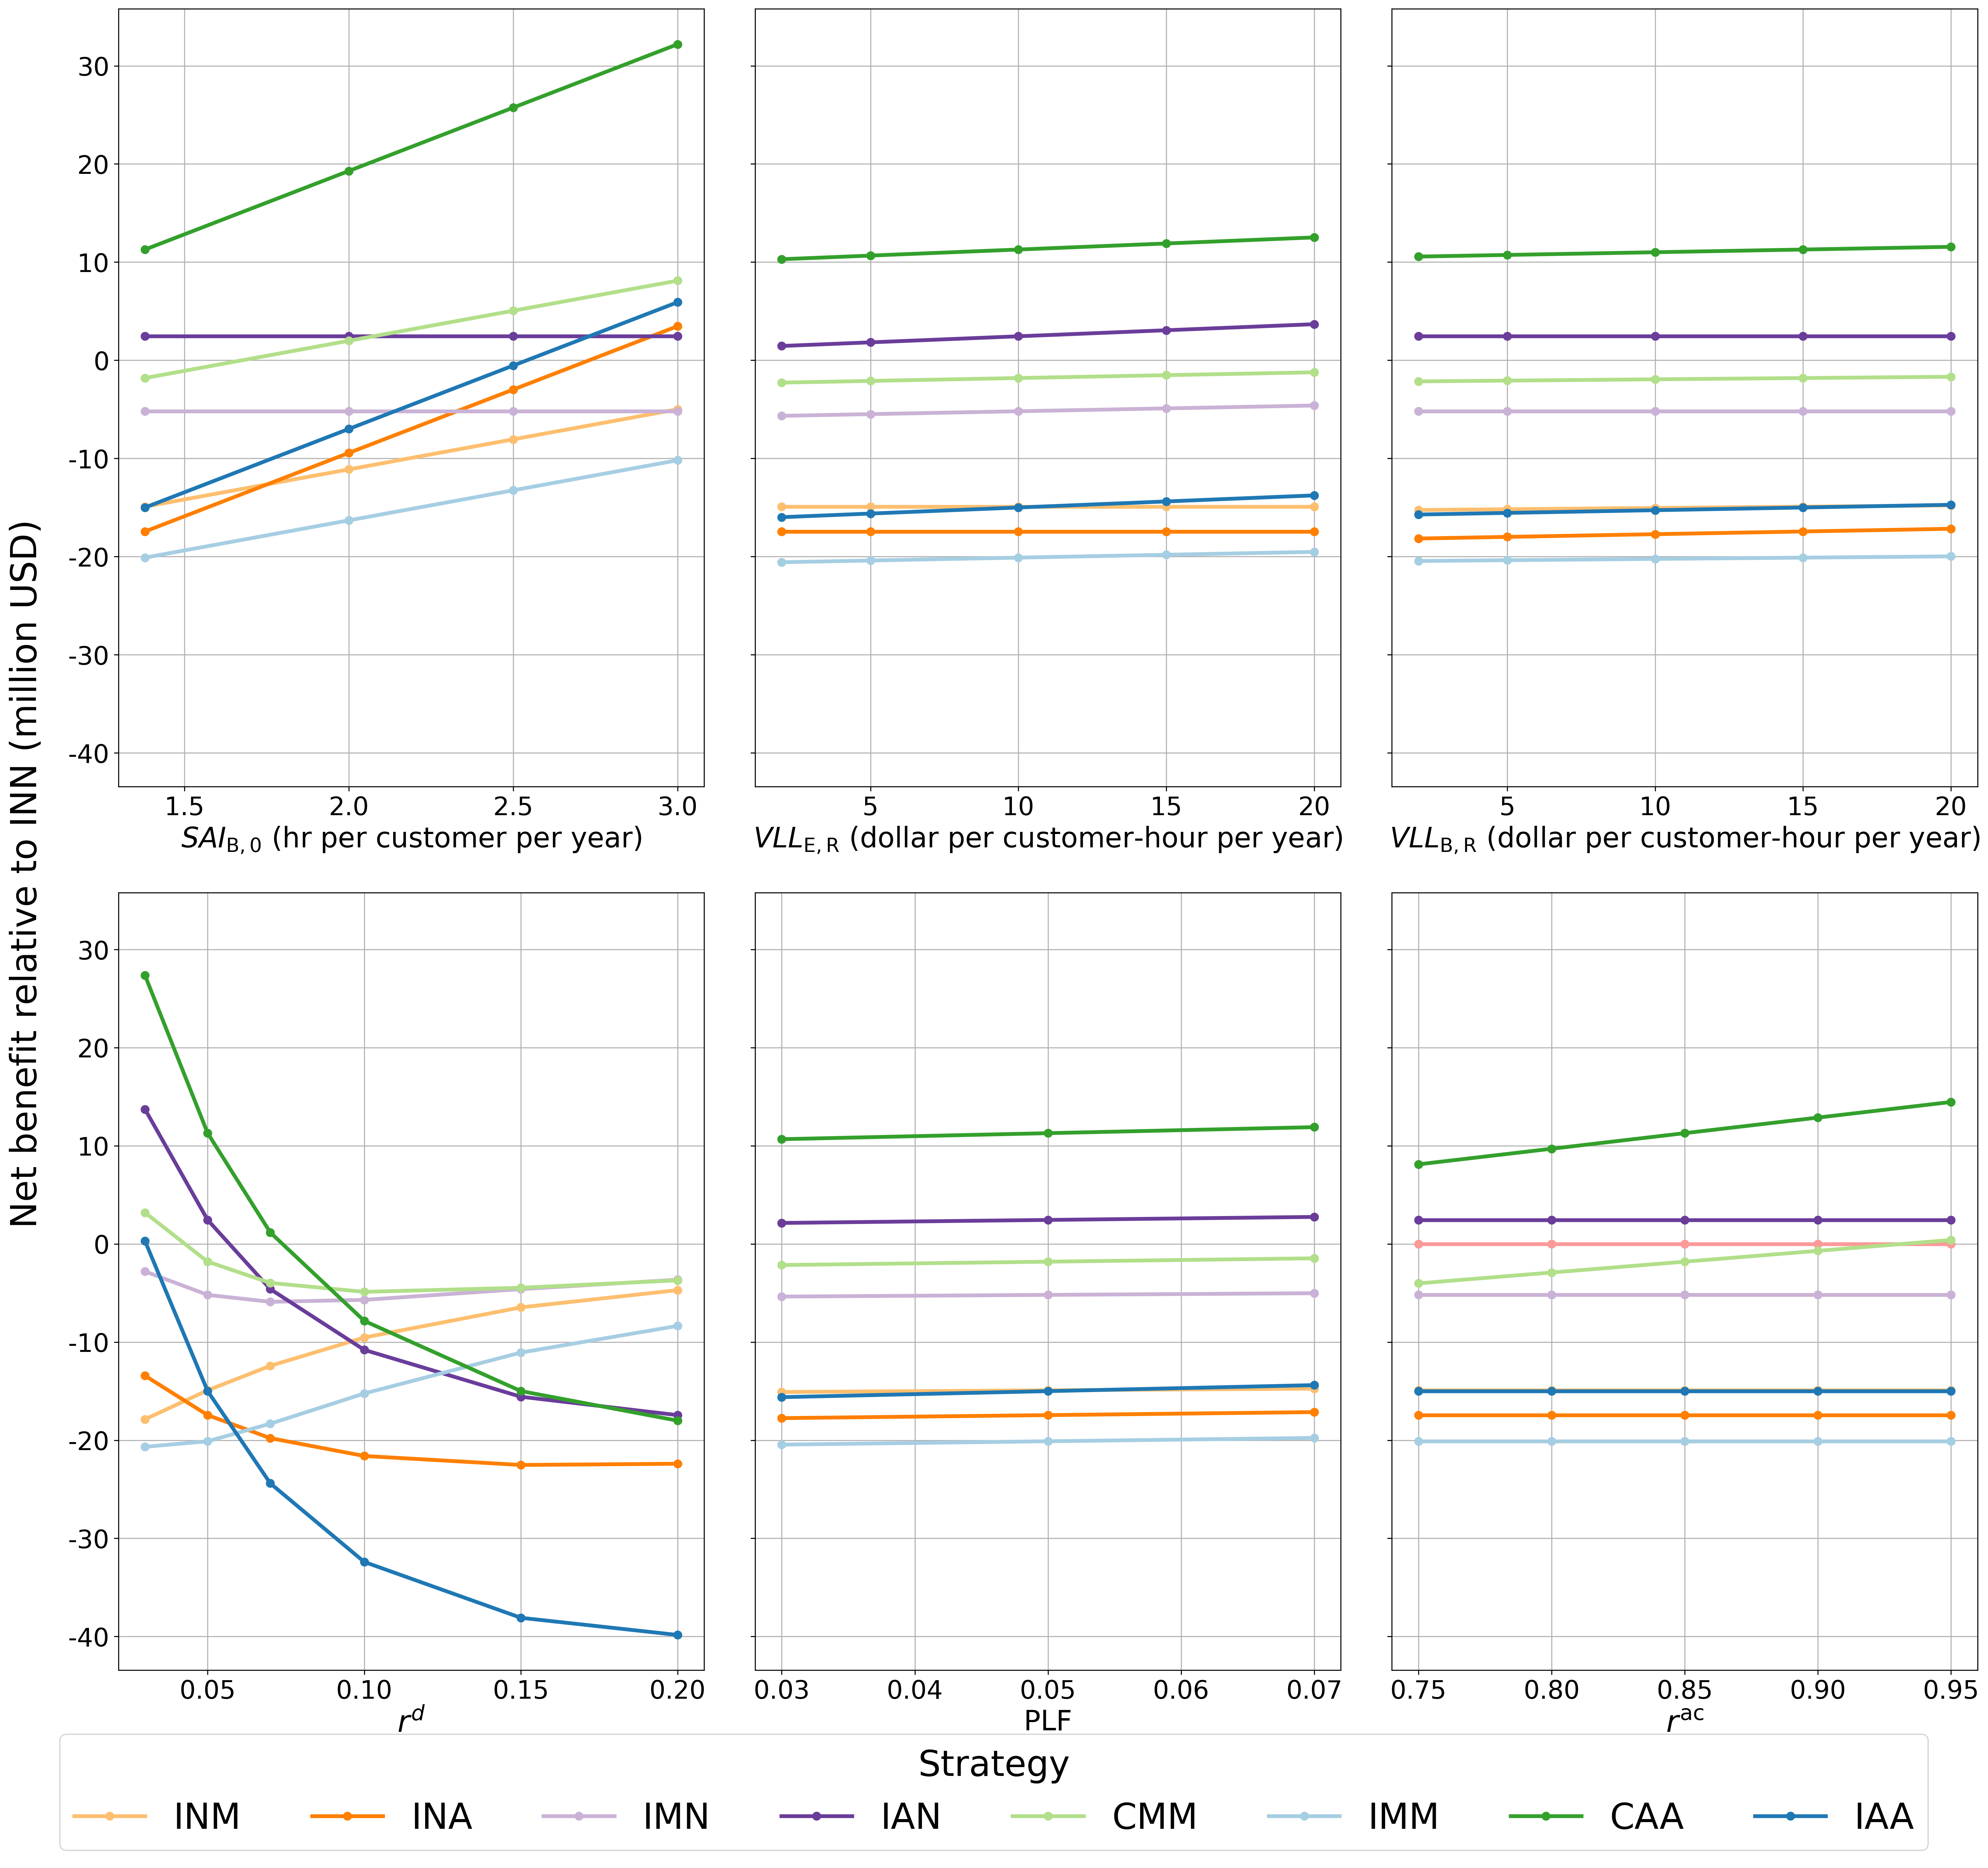

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Base path to the CSV files
base_path = '../../results/outcomes/Sensitivity2/'

# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
}

# Function to format the y-axis tick labels as millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.0f}'

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(23, 22), dpi=300, sharex=False, sharey=True)
axes = axes.flatten()

# Figure 1
sai_values = [1.38, 2, 2.5, 3]
data = {}
for sai in sai_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_SAI_{{B,0}}={sai}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[sai] = df['net_benefit']
combined_df = pd.DataFrame(data)


# Renaming map
rename_map = {
    'INN': 'INN',
    'INC': 'INM',
    'INA': 'INA',
    'ICN': 'IMN',
    'IAN': 'IAN',
    'JCC': 'CMM',
    'ICC': 'IMM',
    'JAA': 'CAA',
    'IAA': 'IAA'
}

combined_df.index = combined_df.index.to_series().replace(rename_map)

ax = axes[0]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy], linewidth=3, alpha=1)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$SAI_{\mathrm{B,0}}$ (hr per customer per year)', fontsize=22)
ax.grid(True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Figure 2
vll_values = [2, 5, 10, 15, 20]
data = {}
for vll in vll_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_vll_el_R_{vll}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[vll] = df['net_benefit']
combined_df = pd.DataFrame(data)

# Renaming map
rename_map = {
    'INN': 'INN',
    'INC': 'INM',
    'INA': 'INA',
    'ICN': 'IMN',
    'IAN': 'IAN',
    'JCC': 'CMM',
    'ICC': 'IMM',
    'JAA': 'CAA',
    'IAA': 'IAA'
}

combined_df.index = combined_df.index.to_series().replace(rename_map)

ax = axes[1]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy], linewidth=3, alpha=1)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$VLL_{\mathrm{E,R}}$ (dollar per customer-hour per year)', fontsize=22)
ax.grid(True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Figure 3
vll_values = [2, 5, 10, 15, 20]
data = {}
for vll in vll_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_vll_br_R_{vll}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[vll] = df['net_benefit']
combined_df = pd.DataFrame(data)

# Renaming map
rename_map = {
    'INN': 'INN',
    'INC': 'INM',
    'INA': 'INA',
    'ICN': 'IMN',
    'IAN': 'IAN',
    'JCC': 'CMM',
    'ICC': 'IMM',
    'JAA': 'CAA',
    'IAA': 'IAA'
}

combined_df.index = combined_df.index.to_series().replace(rename_map)

ax = axes[2]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy], linewidth=3, alpha=1)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$VLL_{\mathrm{B,R}}$ (dollar per customer-hour per year)', fontsize=22)
ax.grid(True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Figure 4
r_values = [0.03, 0.05, 0.07, 0.1, 0.15, 0.2]
data = {}
for r in r_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_r={r}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[r] = df['net_benefit']
combined_df = pd.DataFrame(data)

# Renaming map
rename_map = {
    'INN': 'INN',
    'INC': 'INM',
    'INA': 'INA',
    'ICN': 'IMN',
    'IAN': 'IAN',
    'JCC': 'CMM',
    'ICC': 'IMM',
    'JAA': 'CAA',
    'IAA': 'IAA'
}

combined_df.index = combined_df.index.to_series().replace(rename_map)

ax = axes[3]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy], linewidth=3, alpha=1)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$r^d$', fontsize=24)
ax.grid(True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Figure 5
plf_values = [0.03, 0.05, 0.07]
data = {}
for plf in plf_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_plf={plf}.csv"
    df = pd.read_csv(file_path)
    df = df.loc[df['Strategy'] != "INN"]
    df.set_index('Strategy', inplace=True)
    data[plf] = df['net_benefit']
combined_df = pd.DataFrame(data)

# Renaming map
rename_map = {
    'INN': 'INN',
    'INC': 'INM',
    'INA': 'INA',
    'ICN': 'IMN',
    'IAN': 'IAN',
    'JCC': 'CMM',
    'ICC': 'IMM',
    'JAA': 'CAA',
    'IAA': 'IAA'
}

combined_df.index = combined_df.index.to_series().replace(rename_map)

ax = axes[4]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy], linewidth=3, alpha=1)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel('PLF', fontsize=22)
ax.grid(True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Figure 6
saving_values = [0.05, 0.1, 0.15, 0.2, 0.25]
data = {}
for saving in saving_values:
    file_path = f"{base_path}npv_cost_loss_benefit_relative_cost_saving={saving}.csv"
    df = pd.read_csv(file_path)
    df.set_index('Strategy', inplace=True)
    data[1-saving] = df['net_benefit']
combined_df = pd.DataFrame(data)

# Renaming map
rename_map = {
    'INN': 'INN',
    'INC': 'INM',
    'INA': 'INA',
    'ICN': 'IMN',
    'IAN': 'IAN',
    'JCC': 'CMM',
    'ICC': 'IMM',
    'JAA': 'CAA',
    'IAA': 'IAA'
}

combined_df.index = combined_df.index.to_series().replace(rename_map)

ax = axes[5]
for strategy in combined_df.index:
    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy], linewidth=3, alpha=1)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_xlabel(r'$r^{\mathrm{ac}}$', fontsize=24)
ax.grid(True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Figure 7
#alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#data = {}
#for alpha in alpha_values:
#    file_path = f"{base_path}npv_cost_loss_benefit_relative_alpha={alpha}.csv"
#    df = pd.read_csv(file_path)
#    df = df.loc[df['Strategy'] != "INN"]
#    df.set_index('Strategy', inplace=True)
#    lamb = 1 - alpha
#    data[lamb] = df['net_benefit']
#combined_df = pd.DataFrame(data)
#ax = axes[6]
#for strategy in combined_df.index:
#    ax.plot(combined_df.columns, combined_df.loc[strategy], label=strategy, marker='o', color=strategy_colors[strategy])
#ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
#ax.set_xlabel(r'$\lambda$', fontsize=22)
#ax.grid(True)
#ax.tick_params(axis='x', labelsize=18)
#ax.tick_params(axis='y', labelsize=18)

# Hide the last subplot (unused)
#axes[-3].axis('off')
#axes[-2].axis('off')
#axes[-1].axis('off')

# Set a single y-axis label for the entire figure
fig.text(0.04, 0.5, 'Net benefit relative to INN (million USD)', va='center', rotation='vertical', fontsize=28)

# Create a single legend for the entire figure at the bottom
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=8, title='Strategy', title_fontsize=28, fontsize=28)

# Adjust layout to leave space for the legend
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95], pad=3.0)

plt.show()
